In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor

!pip install xgboost
import xgboost as xgb

!pip install lightgbm
from lightgbm import LGBMRegressor

!pip install catboost
from catboost import CatBoostRegressor

!pip install optuna
import optuna

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 400)

plt.style.use('seaborn-v0_8-deep')

%matplotlib inline

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# **FUNCTIONS**

## **Scatter Plot**

In [5]:
def PlotScatter(x, y, title, xunit, yunit, format_x, x_size):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    plt.scatter(x, y, alpha=0.7)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(1.05, -0.025)
    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

    if (format_x == 1):
        plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])

    if (x_size == 0):
        plt.gcf().set_size_inches(6, 5)
    else:
        plt.gcf().set_size_inches(x_size, 5)
    plt.show()
    plt.close()

## **Box Plot**

In [7]:
def PlotBoxPlot(df_x, df_y, title, yunit):
    plt.figure(figsize=(6, 5))
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.boxplot(x = df_x, y = df_y, palette = "mako")

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_xlabel("", fontsize = 1)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

    plt.show()
    plt.close()

In [8]:
def PlotBoxPlotV2(df_x, df_y, title, yunit, size_x, size_y):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.boxplot(x = df_x, y = df_y, palette = "mako")

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_xlabel("", fontsize = 1)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

    plt.gcf().set_size_inches(size_x, size_y)

    plt.show()
    plt.close()

## **Regression Plot**

In [10]:
def PlotRegPlot(df_x, df_y, title, xunit, yunit):
    plt.figure(figsize=(6, 5))
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.regplot(x = df_x, y = df_y, line_kws={"color": "#31273F"})

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(1.05, -0.025)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])

    plt.show()
    plt.close()

In [11]:
def PlotRegPlot2(df_x, df_y, title):
    plt.figure(figsize=(6, 5))
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")
    
    plt.title(title)
    sns.regplot(x = df_x, y = df_y, line_kws={"color": "#31273F"})
    
    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_ylabel("US$", fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)
    plt.gca().set_xlabel("", fontsize = 10)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

    plt.xlim(0,)
    plt.ylim(0,)

    plt.show()
    plt.close()

## **Histogram**

In [13]:
def HistPlot(x, title, xunit, x_size):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.histplot(x = x)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(0.98, -0.08)

    plt.ylabel("Count")

    if (x_size == 0):
        plt.gcf().set_size_inches(6, 5)
    else:
        plt.gcf().set_size_inches(x_size, 5)

    plt.show()
    plt.close()

## **Predicted vs Actual Values**

In [15]:
def PlotFitted(y_test, yhat, title):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")
    
    plt.title(title)

    y_test1 = np.exp(y_test)
    yhat1 = np.exp(yhat)

    sns.scatterplot(x=y_test1.to_numpy().flatten(), y=yhat1, alpha=0.6)
    plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'r--')

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")
    
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")

    plt.gcf().set_size_inches(7, 5)

    plt.ylim(0,)
    plt.xlim(0,)
    
    plt.show()
    plt.close()
    
    
    print("\n- Mean Squared Error:", mean_squared_error(y_test, yhat))
    print("- Root Mean Squared Error:", root_mean_squared_error(y_test, yhat))

In [16]:
def PlotFittedV(yhat, y_test, model, x_data, y_data, title, xlabel):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)

    ax2 = sns.distplot(y_test, hist=False, color="r", label = "Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Predicted Value", ax = ax2)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.ylabel("Density")
    plt.xlabel(xlabel)
    plt.legend(['Actual Value', 'Predicted Value'], framealpha=0)

    plt.gcf().set_size_inches(7, 5)

    plt.show()
    plt.close()

    print("\n- Mean Squared Error:", mean_squared_error(y_test, yhat))
    print("- Root Mean Squared Error:", root_mean_squared_error(y_test, yhat))
    print("- Cross-Validation Score:", cross_val_score(model, x_data, y_data, cv=5).mean())

In [17]:
def PlotFittedV2(yhat, y_test, title, xlabel):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)

    ax2 = sns.distplot(np.exp(y_test), hist=False, color="r", label = "Actual Value")
    sns.distplot(np.exp(yhat), hist=False, color="b", label="Predicted Value", ax = ax2)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.ylabel("Density")
    plt.xlabel(xlabel)
    plt.legend(['Actual Value', 'Predicted Value'], framealpha=0)

    plt.gcf().set_size_inches(7, 5)

    plt.show()
    plt.close()

    print("\n- Mean Squared Error:", mean_squared_error(y_test, yhat))
    print("- Root Mean Squared Error:", root_mean_squared_error(y_test, yhat))

## **Line Plot**

In [19]:
def PlotLine(y, title, yunit, x_size, y_size):
  plt.figure().patch.set_facecolor("0.85")
  plt.axes().set(facecolor = "0.85")

  plt.title(title)
  plt.plot(y)

  plt.grid(False)
  plt.gca().spines['bottom'].set_visible(True)
  plt.gca().spines['left'].set_visible(True)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['bottom'].set_color("black")
  plt.gca().spines['left'].set_color("black")

  plt.gca().set_xlabel("", fontsize = 0)
  #plt.gca().xaxis.set_label_coords(1.05, -0.025)
  plt.gca().set_ylabel(yunit, fontsize = 10)
  plt.gca().yaxis.set_label_coords(-0.16, .98)

  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

  plt.gcf().set_size_inches(x_size, y_size)

  plt.show()
  plt.close()

## **K-Fold Target Encoding**

In [21]:
def KFTE(df, df_test, categ_f, target):
  kf = KFold(n_splits = 5, shuffle = True, random_state = 13)

  nome = categ_f + "_E"

  df[nome] = 0.0

  for train_idx, val_idx in kf.split(df):
      fold_train = df.iloc[train_idx]
      fold_valid  = df.iloc[val_idx]

      medias_feature = fold_train.groupby(categ_f)[target].mean()
      media_global = fold_train[target].mean()

      feature_encoded = fold_valid[categ_f].map(medias_feature).fillna(media_global)
      df.loc[val_idx, nome] = feature_encoded

  mapping = df.groupby(categ_f)[target].mean().to_dict()
  global_mean = df[target].mean()

  df_test[categ_f] = df_test[categ_f].map(mapping).fillna(global_mean)

# **DATASET LOADING**

In [23]:
HousePricesDF = pd.read_csv("../data/processed/1.Data_Cleaning_train.csv")
HousePricesDF_test = pd.read_csv("../data/processed/1.Data_Cleaning_test.csv")
HousePricesDF.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0   8450.0   Pave      Reg         Lvl   
1   2          20       RL         80.0   9600.0   Pave      Reg         Lvl   
2   3          60       RL         68.0  11250.0   Pave      IR1         Lvl   
3   4          70       RL         60.0   9550.0   Pave      IR1         Lvl   
4   5          60       RL         84.0  14260.0   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr     856.0     854.0           0.0     1710.0   
1          Y      SBrkr    1262.0       0.0           0.0     1262.0   
2          Y      SBrkr     920.0     866.0           0.0     1786.0   
3          Y      SBrkr     961.0     756.0           0.0     1717.0   
4          Y      SBrkr    1145.0    1053.0           0.0     2198.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3  

In [24]:
HousePricesDF.shape

(1390, 77)

In [25]:
HousePricesDF_test.shape

(1459, 76)

# **EXPLORATORY DATA ANALYSIS**

## **ENCODING AND CORRELATION ANALYSIS**

We will use K-Fold Target Encoding to encode categorical variables, considering the weight of their categories in relation to the target variable.

### **IDENTIFYING CATEGORICAL FEATURE CARDINALITY**

We will follow these steps when analyzing categorical variables:<br>

1. Identify categories with low cardinality (proportion < 1%);
2. Group rare categories into a single 'Other' category;
3. If the proportion of 'Other' is still below 1%, assess whether it is feasible to merge it with another category;
4. Apply K-Fold Target Encoding with 5 folds.

#### **MSSubClass**

In [32]:
HousePricesDF['MSSubClass'].value_counts(normalize=True) * 100

MSSubClass
20     37.194245
60     20.000000
50     10.143885
120     6.187050
30      4.820144
160     4.316547
70      4.244604
80      3.956835
90      3.237410
190     1.870504
85      1.438849
45      0.863309
75      0.791367
180     0.719424
40      0.215827
Name: proportion, dtype: float64

In [33]:
HousePricesDF['MSSubClass'] = HousePricesDF['MSSubClass'].replace({45: "Other", 75: "Other", 180: "Other", 40: "Other"})
HousePricesDF_test['MSSubClass'] = HousePricesDF_test['MSSubClass'].replace({45: "Other", 75: "Other", 180: "Other", 40: "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'MSSubClass', 'SalePrice')

<Figure size 600x500 with 0 Axes>

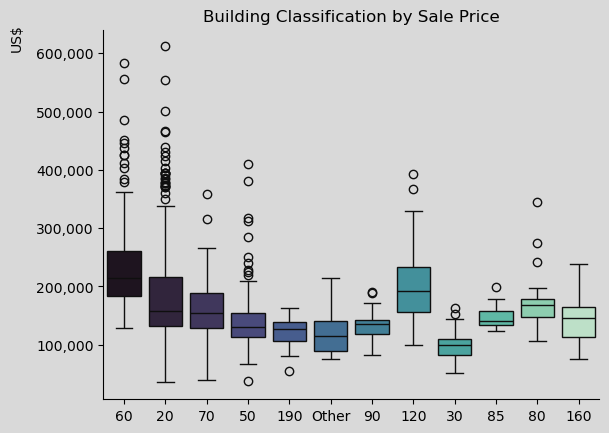


Correlation: 0.4971422927692028


In [34]:
PlotBoxPlot(HousePricesDF['MSSubClass'], HousePricesDF['SalePrice'], "Building Classification by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['MSSubClass_E']))

In [35]:
HousePricesDF['MSSubClass'] = HousePricesDF['MSSubClass_E'].copy()
HousePricesDF = HousePricesDF.drop('MSSubClass_E', axis = 1)

#### **MSZoning**

In [37]:
HousePricesDF['MSZoning'].value_counts(normalize=True) * 100

MSZoning
RL         78.992806
RM         15.035971
FV          4.316547
RH          1.079137
C (all)     0.575540
Name: proportion, dtype: float64

In [38]:
HousePricesDF.groupby('MSZoning')[['SalePrice']].mean()

SalePrice
MSZoning               
C (all)    78672.500000
FV        212832.283333
RH        126995.600000
RL        187473.075592
RM        121260.239234

Since the average value of the target variable for 'RH' is nearly double that of 'C', we will not merge them into an 'Other' category.

In [40]:
KFTE(HousePricesDF, HousePricesDF_test, 'MSZoning', 'SalePrice')

<Figure size 600x500 with 0 Axes>

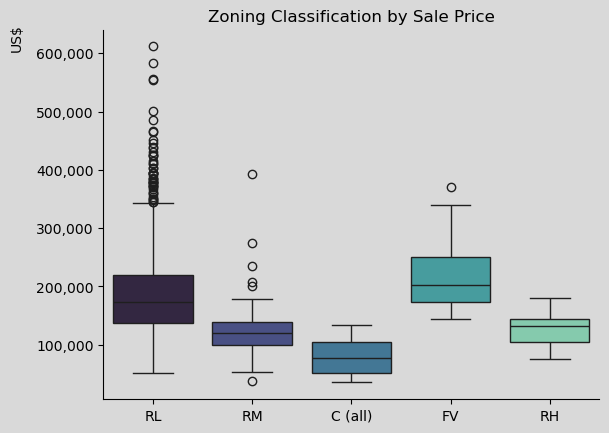


Correlation: 0.34950849294012604


In [41]:
PlotBoxPlot(HousePricesDF['MSZoning'], HousePricesDF['SalePrice'], "Zoning Classification by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['MSZoning_E']))

In [42]:
HousePricesDF['MSZoning'] = HousePricesDF['MSZoning_E'].copy()
HousePricesDF = HousePricesDF.drop('MSZoning_E', axis = 1)

#### **LotFrontage**

<Figure size 600x500 with 0 Axes>

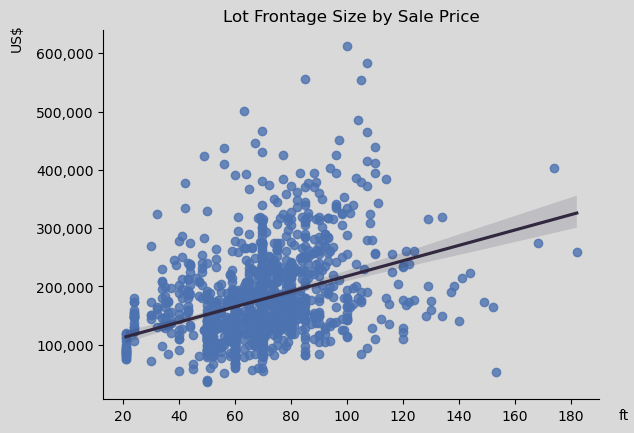


Correlation: 0.35107885902399466


In [44]:
PlotRegPlot(HousePricesDF['LotFrontage'], HousePricesDF['SalePrice'], "Lot Frontage Size by Sale Price", "ft", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['LotFrontage']))

#### **LotArea**

<Figure size 600x500 with 0 Axes>

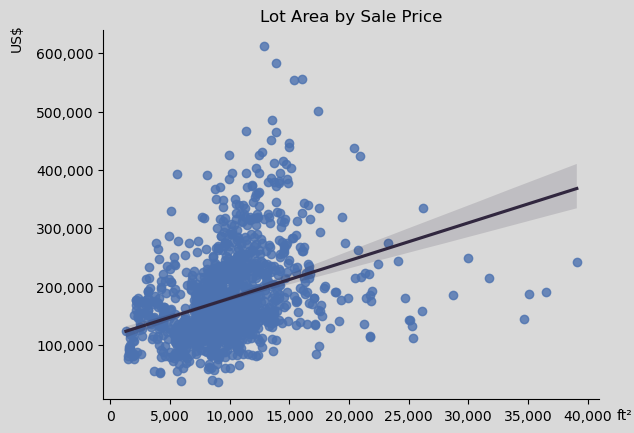


Correlation: 0.35913376863413704


In [46]:
PlotRegPlot(HousePricesDF['LotArea'], HousePricesDF['SalePrice'], "Lot Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['LotArea']))

#### **Street**

In [48]:
HousePricesDF['Street'].value_counts(normalize=True) * 100

Street
Pave    99.71223
Grvl     0.28777
Name: proportion, dtype: float64

In [49]:
HousePricesDF = HousePricesDF.drop('Street', axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('Street', axis = 1)

#### **LotShape**

In [51]:
HousePricesDF['LotShape'].value_counts(normalize=True) * 100

LotShape
Reg    64.172662
IR1    32.949640
IR2     2.302158
IR3     0.575540
Name: proportion, dtype: float64

In [52]:
HousePricesDF.groupby('LotShape')[['SalePrice']].mean()

SalePrice
LotShape               
IR1       200751.604803
IR2       208699.625000
IR3       203170.625000
Reg       163951.894619

In [53]:
HousePricesDF['LotShape'] = HousePricesDF['LotShape'].replace({"IR2": "Other", "IR3": "Other"})
HousePricesDF_test['LotShape'] = HousePricesDF_test['LotShape'].replace({"IR2": "Other", "IR3": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'LotShape', 'SalePrice')

<Figure size 600x500 with 0 Axes>

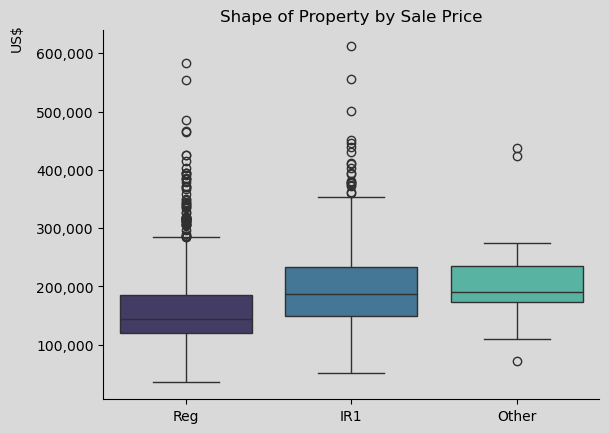


Correlation: 0.2344564621583354


In [54]:
PlotBoxPlot(HousePricesDF['LotShape'], HousePricesDF['SalePrice'], "Shape of Property by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['LotShape_E']))

In [55]:
HousePricesDF['LotShape'] = HousePricesDF['LotShape_E'].copy()
HousePricesDF = HousePricesDF.drop('LotShape_E', axis = 1)

#### **LandContour**

In [57]:
HousePricesDF['LandContour'].value_counts(normalize=True) * 100

LandContour
Lvl    90.863309
Bnk     4.100719
HLS     3.309353
Low     1.726619
Name: proportion, dtype: float64

In [58]:
KFTE(HousePricesDF, HousePricesDF_test, 'LandContour', 'SalePrice')

<Figure size 600x500 with 0 Axes>

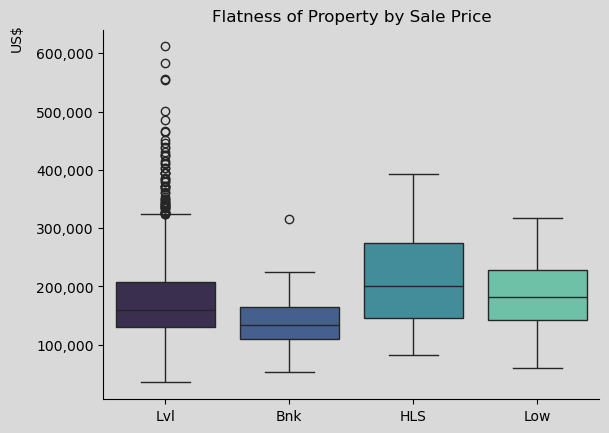


Correlation: 0.1275710310614651


In [59]:
PlotBoxPlot(HousePricesDF['LandContour'], HousePricesDF['SalePrice'], "Flatness of Property by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['LandContour_E']))

In [60]:
HousePricesDF['LandContour'] = HousePricesDF['LandContour_E'].copy()
HousePricesDF = HousePricesDF.drop('LandContour_E', axis = 1)

#### **Utilities**

In [62]:
HousePricesDF['Utilities'].value_counts(normalize=True) * 100

Utilities
AllPub    99.928058
NoSeWa     0.071942
Name: proportion, dtype: float64

In [63]:
HousePricesDF = HousePricesDF.drop('Utilities', axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('Utilities', axis = 1)

#### **LotConfig**

In [65]:
HousePricesDF['LotConfig'].value_counts(normalize=True) * 100

LotConfig
Inside     72.446043
Corner     17.913669
CulDSac     5.971223
FR2         3.381295
FR3         0.287770
Name: proportion, dtype: float64

In [66]:
HousePricesDF.groupby('LotConfig')[['SalePrice']].mean()

SalePrice
LotConfig               
Corner     174629.975904
CulDSac    210246.144578
FR2        177934.574468
FR3        208475.000000
Inside     175137.000000

In [67]:
KFTE(HousePricesDF, HousePricesDF_test, 'LotConfig', 'SalePrice')

<Figure size 600x500 with 0 Axes>

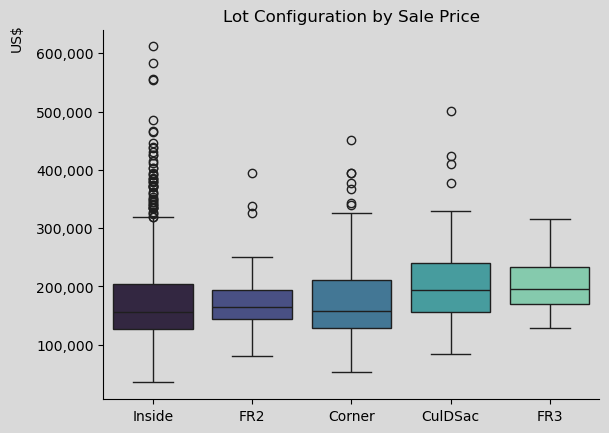


Correlation: 0.08284567030125882


In [68]:
PlotBoxPlot(HousePricesDF['LotConfig'], HousePricesDF['SalePrice'], "Lot Configuration by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['LotConfig_E']))

In [69]:
HousePricesDF = HousePricesDF.drop(columns = {'LotConfig', 'LotConfig_E'}, axis = 1)

In [70]:
HousePricesDF_test = HousePricesDF_test.drop(columns = {'LotConfig'}, axis = 1)

#### **LandSlope**

In [72]:
HousePricesDF['LandSlope'].value_counts(normalize=True) * 100

LandSlope
Gtl    95.395683
Mod     4.100719
Sev     0.503597
Name: proportion, dtype: float64

In [73]:
HousePricesDF.groupby('LandSlope')[['SalePrice']].mean()

SalePrice
LandSlope               
Gtl        176990.708145
Mod        188586.298246
Sev        150568.571429

In [74]:
HousePricesDF['LandSlope'] = HousePricesDF['LandSlope'].replace({"Mod": "Other", "Sev": "Other"})
HousePricesDF_test['LandSlope'] = HousePricesDF_test['LandSlope'].replace({"Mod": "Other", "Sev": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'LandSlope', 'SalePrice')

<Figure size 600x500 with 0 Axes>

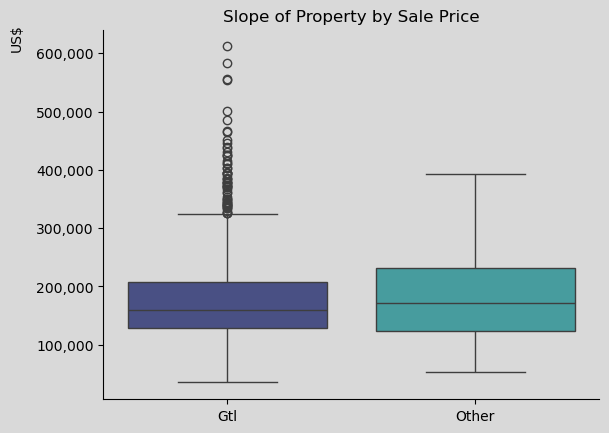


Correlation: -0.03776123696658219


In [75]:
PlotBoxPlot(HousePricesDF['LandSlope'], HousePricesDF['SalePrice'], "Slope of Property by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['LandSlope_E']))

In [76]:
HousePricesDF = HousePricesDF.drop(columns = {'LandSlope', 'LandSlope_E'}, axis = 1)

In [77]:
HousePricesDF_test = HousePricesDF_test.drop('LandSlope', axis = 1)

#### **Neighborhood**

In [79]:
HousePricesDF['Neighborhood'].value_counts(normalize=True) * 100

Neighborhood
NAmes      15.611511
CollgCr    10.791367
OldTown     7.553957
Edwards     6.834532
Somerst     5.827338
Gilbert     5.683453
NridgHt     5.323741
NWAmes      5.107914
Sawyer      5.107914
BrkSide     4.100719
SawyerW     3.956835
Crawfor     3.597122
Mitchel     3.381295
IDOTRR      2.517986
Timber      2.446043
NoRidge     2.374101
SWISU       1.726619
StoneBr     1.654676
ClearCr     1.438849
MeadowV     1.151079
Blmngtn     1.151079
BrDale      1.151079
Veenker     0.719424
NPkVill     0.647482
Blueste     0.143885
Name: proportion, dtype: float64

In [80]:
HousePricesDF['Neighborhood'] = HousePricesDF['Neighborhood'].replace({"Veenker": "Other", "NPkVill": "Other", "Blueste": "Other"})
HousePricesDF_test['Neighborhood'] = HousePricesDF_test['Neighborhood'].replace({"Veenker": "Other", "NPkVill": "Other", "Blueste": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'Neighborhood', 'SalePrice')

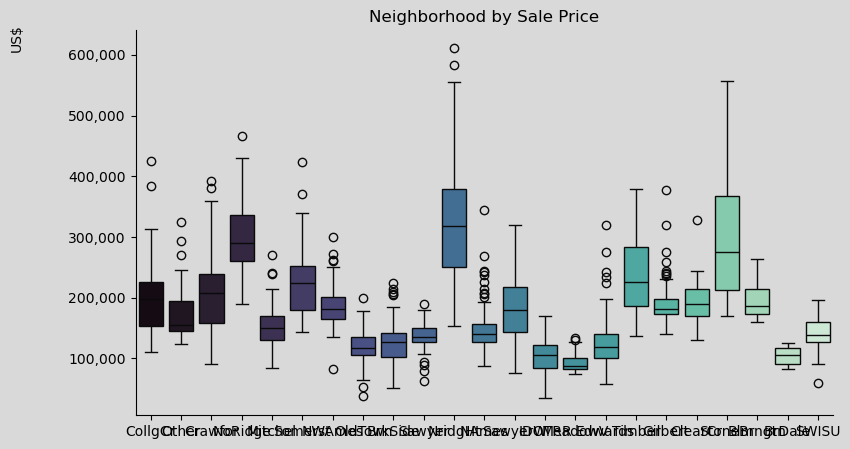


Correlation: 0.7456913492073306


In [81]:
PlotBoxPlotV2(HousePricesDF['Neighborhood'], HousePricesDF['SalePrice'], "Neighborhood by Sale Price", "US$", 9, 5)
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Neighborhood_E']))

In [82]:
HousePricesDF['Neighborhood'] = HousePricesDF['Neighborhood_E'].copy()
HousePricesDF = HousePricesDF.drop('Neighborhood_E', axis = 1)

#### **Condition1**

In [84]:
HousePricesDF['Condition1'].value_counts(normalize=True) * 100

Condition1
Norm      86.546763
Feedr      5.467626
Artery     3.165468
RRAn       1.798561
PosN       1.223022
RRAe       0.791367
PosA       0.503597
RRNn       0.359712
RRNe       0.143885
Name: proportion, dtype: float64

In [85]:
HousePricesDF['Condition1'] = HousePricesDF['Condition1'].replace({"RRAe": "Other", "PosA": "Other", "RRNn": "Other", "RRNe": "Other"})
HousePricesDF_test['Condition1'] = HousePricesDF_test['Condition1'].replace({"RRAe": "Other", "PosA": "Other", "RRNn": "Other", "RRNe": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'Condition1', 'SalePrice')

<Figure size 600x500 with 0 Axes>

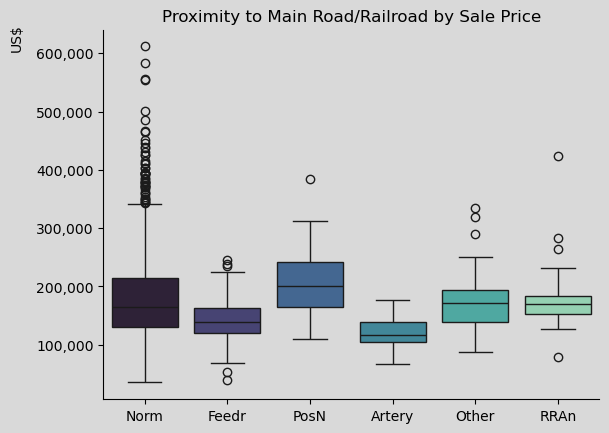


Correlation: 0.18313846349899504


In [86]:
PlotBoxPlot(HousePricesDF['Condition1'], HousePricesDF['SalePrice'], "Proximity to Main Road/Railroad by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Condition1_E']))

In [87]:
HousePricesDF['Condition1'] = HousePricesDF['Condition1_E'].copy()
HousePricesDF = HousePricesDF.drop('Condition1_E', axis = 1)

#### **Condition2**

In [89]:
HousePricesDF['Condition2'].value_counts(normalize=True) * 100

Condition2
Norm      99.064748
Feedr      0.431655
Artery     0.143885
RRNn       0.143885
PosN       0.071942
RRAn       0.071942
RRAe       0.071942
Name: proportion, dtype: float64

In [90]:
HousePricesDF['Condition2'] = HousePricesDF['Condition2'].replace({"Norm": 1, "Feedr": 0, "Artery": 0, "RRNn": 0, "PosN": 0, "RRAn": 0, "RRAe": 0})
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Condition2']))

Correlation: 0.04655285618520171


In [91]:
HousePricesDF = HousePricesDF.drop('Condition2', axis = 1)

In [92]:
HousePricesDF_test = HousePricesDF_test.drop('Condition2', axis = 1)

#### **BldgType**

In [94]:
HousePricesDF['BldgType'].value_counts(normalize=True) * 100

BldgType
1Fam      83.812950
TwnhsE     7.913669
Duplex     3.237410
Twnhs      3.093525
2fmCon     1.942446
Name: proportion, dtype: float64

In [95]:
KFTE(HousePricesDF, HousePricesDF_test, 'BldgType', 'SalePrice')

<Figure size 600x500 with 0 Axes>

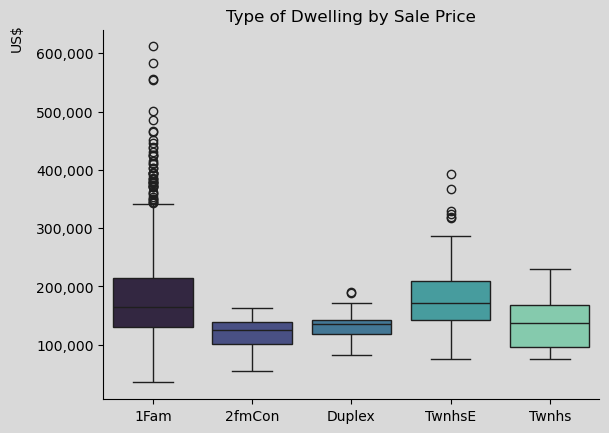


Correlation: 0.18388738547661418


In [96]:
PlotBoxPlot(HousePricesDF['BldgType'], HousePricesDF['SalePrice'], "Type of Dwelling by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BldgType_E']))

In [97]:
HousePricesDF['BldgType'] = HousePricesDF['BldgType_E'].copy()
HousePricesDF = HousePricesDF.drop('BldgType_E', axis = 1)

#### **HouseStyle**

In [99]:
HousePricesDF['HouseStyle'].value_counts(normalize=True) * 100

HouseStyle
1Story    50.431655
2Story    30.000000
1.5Fin    10.791367
SLvl       4.460432
SFoyer     2.302158
1.5Unf     1.007194
2.5Unf     0.647482
2.5Fin     0.359712
Name: proportion, dtype: float64

In [100]:
HousePricesDF['HouseStyle'] = HousePricesDF['HouseStyle'].replace({"2.5Unf": "Other", "2.5Fin": "Other"})
HousePricesDF_test['HouseStyle'] = HousePricesDF_test['HouseStyle'].replace({"2.5Unf": "Other", "2.5Fin": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'HouseStyle', 'SalePrice')

<Figure size 600x500 with 0 Axes>

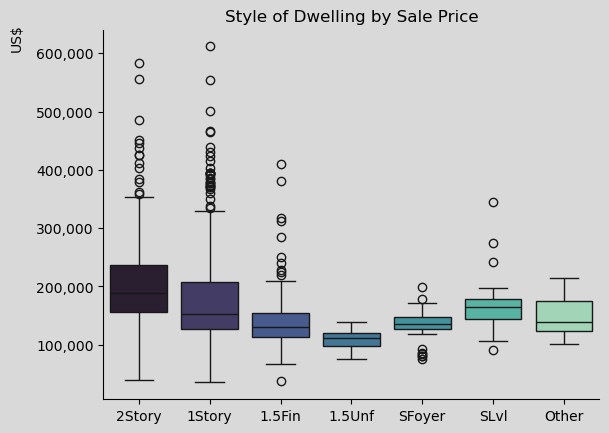


Correlation: 0.27624130073296466


In [101]:
PlotBoxPlot(HousePricesDF['HouseStyle'], HousePricesDF['SalePrice'], "Style of Dwelling by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['HouseStyle_E']))

In [102]:
HousePricesDF['HouseStyle'] = HousePricesDF['HouseStyle_E'].copy()
HousePricesDF = HousePricesDF.drop('HouseStyle_E', axis = 1)

#### **OverallQual**

<Figure size 600x500 with 0 Axes>

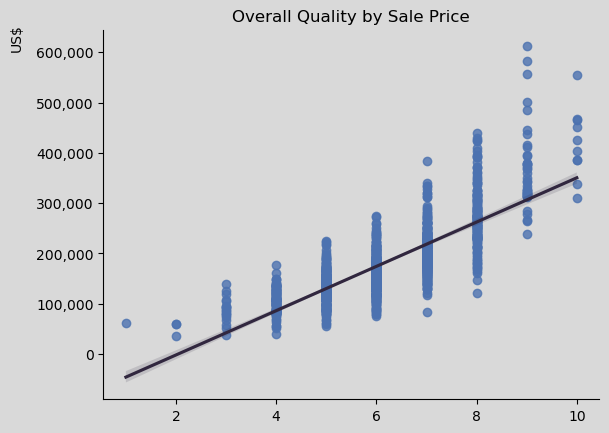


Correlation: 0.8028045068862418


In [104]:
PlotRegPlot(HousePricesDF['OverallQual'], HousePricesDF['SalePrice'], "Overall Quality by Sale Price", "", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['OverallQual']))

#### **OverallCond**

<Figure size 600x500 with 0 Axes>

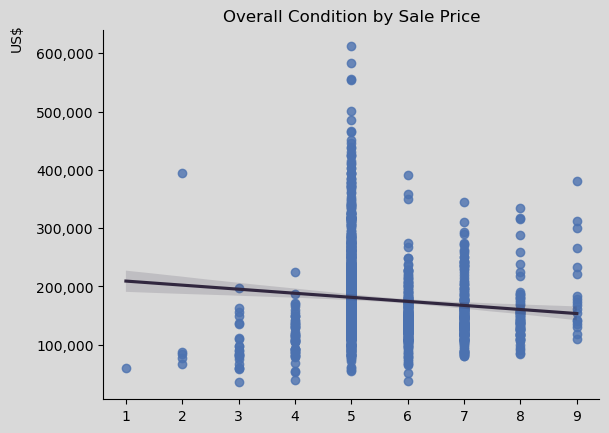


Correlation: -0.10422126734736083


In [106]:
PlotRegPlot(HousePricesDF['OverallCond'], HousePricesDF['SalePrice'], "Overall Condition by Sale Price", "", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['OverallCond']))

#### **YearBuilt**

<Figure size 600x500 with 0 Axes>

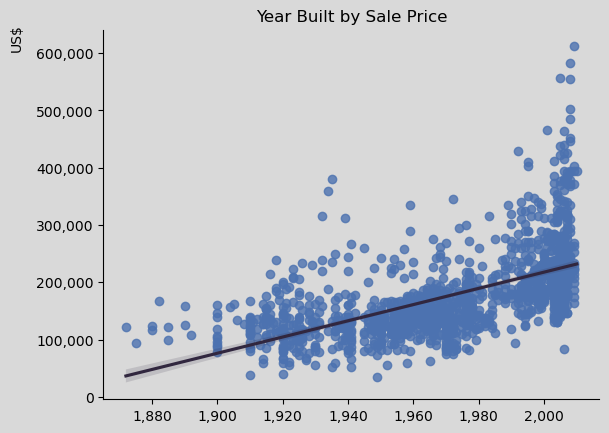


Correlation: 0.5754864622026999


In [108]:
PlotRegPlot(HousePricesDF['YearBuilt'], HousePricesDF['SalePrice'], "Year Built by Sale Price", "", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['YearBuilt']))

#### **YearRemodAdd**

<Figure size 600x500 with 0 Axes>

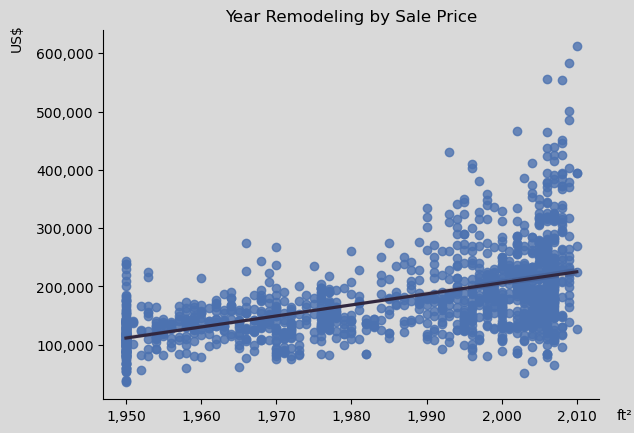


Correlation: 0.5332609199455549


In [110]:
PlotRegPlot(HousePricesDF['YearRemodAdd'], HousePricesDF['SalePrice'], "Year Remodeling by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['YearRemodAdd']))

#### **RoofStyle**

In [112]:
HousePricesDF['RoofStyle'].value_counts(normalize=True) * 100

RoofStyle
Gable      78.848921
Hip        19.136691
Gambrel     0.791367
Flat        0.719424
Mansard     0.431655
Shed        0.071942
Name: proportion, dtype: float64

In [113]:
HousePricesDF['RoofStyle'] = HousePricesDF['RoofStyle'].replace({"Gambrel": "Other", "Flat": "Other", "Mansard	": "Other", "Shed": "Other"})
HousePricesDF_test['RoofStyle'] = HousePricesDF_test['RoofStyle'].replace({"Gambrel": "Other", "Flat": "Other", "Mansard	": "Other", "Shed": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'RoofStyle', 'SalePrice')

<Figure size 600x500 with 0 Axes>

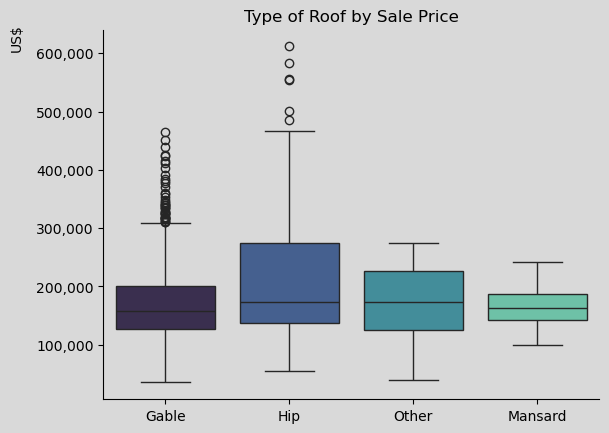


Correlation: 0.22270708325461197


In [114]:
PlotBoxPlot(HousePricesDF['RoofStyle'], HousePricesDF['SalePrice'], "Type of Roof by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['RoofStyle_E']))

In [115]:
HousePricesDF['RoofStyle'] = HousePricesDF['RoofStyle_E'].copy()
HousePricesDF = HousePricesDF.drop('RoofStyle_E', axis = 1)

#### **RoofMatl**

In [117]:
HousePricesDF['RoofMatl'].value_counts(normalize=True) * 100

RoofMatl
CompShg    98.920863
Tar&Grv     0.575540
WdShake     0.215827
Metal       0.071942
Membran     0.071942
WdShngl     0.071942
Roll        0.071942
Name: proportion, dtype: float64

In [118]:
HousePricesDF['RoofMatl'] = HousePricesDF['RoofMatl'].replace({"CompShg": 1, "Tar&Grv": 0, "WdShake": 0, "Metal": 0, "Membran": 0, "WdShngl": 0, "Roll": 0})
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['RoofMatl']))

Correlation: -0.013293375669189292


In [119]:
HousePricesDF = HousePricesDF.drop('RoofMatl', axis = 1)

In [120]:
HousePricesDF_test = HousePricesDF_test.drop('RoofMatl', axis = 1)

#### **Exterior1st**

In [122]:
HousePricesDF['Exterior1st'].value_counts(normalize=True) * 100

Exterior1st
VinylSd    35.827338
HdBoard    15.611511
MetalSd    15.323741
Wd Sdng    13.812950
Plywood     6.906475
CemntBd     4.028777
BrkFace     3.381295
WdShing     1.726619
Stucco      1.582734
AsbShng     1.366906
BrkComm     0.143885
AsphShn     0.071942
Stone       0.071942
ImStucc     0.071942
CBlock      0.071942
Name: proportion, dtype: float64

In [123]:
HousePricesDF['Exterior1st'] = HousePricesDF['Exterior1st'].replace({"BrkComm": "Other", "AsphShn": "Other", "Stone": "Other", "ImStucc": "Other", "CBlock": "Other"})
HousePricesDF_test['Exterior1st'] = HousePricesDF_test['Exterior1st'].replace({"BrkComm": "Other", "AsphShn": "Other", "Stone": "Other", "ImStucc": "Other", "CBlock": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'Exterior1st', 'SalePrice')

<Figure size 600x500 with 0 Axes>

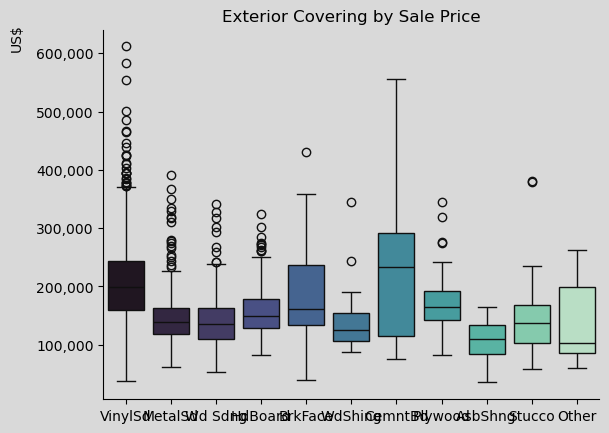


Correlation: 0.3945699396452756


In [124]:
PlotBoxPlot(HousePricesDF['Exterior1st'], HousePricesDF['SalePrice'], "Exterior Covering by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Exterior1st_E']))

In [125]:
HousePricesDF['Exterior1st'] = HousePricesDF['Exterior1st_E'].copy()
HousePricesDF = HousePricesDF.drop('Exterior1st_E', axis = 1)

#### **Exterior2nd**

In [127]:
HousePricesDF['Exterior2nd'].value_counts(normalize=True) * 100

Exterior2nd
VinylSd    35.035971
MetalSd    14.892086
HdBoard    14.388489
Wd Sdng    13.381295
Plywood     9.208633
CmentBd     4.028777
Wd Shng     2.589928
BrkFace     1.654676
Stucco      1.654676
AsbShng     1.366906
ImStucc     0.647482
Brk Cmn     0.503597
Stone       0.287770
AsphShn     0.215827
Other       0.071942
CBlock      0.071942
Name: proportion, dtype: float64

In [128]:
HousePricesDF['Exterior2nd'] = HousePricesDF['Exterior2nd'].replace({"ImStucc": "Other", "Brk Cmn": "Other", "Stone": "Other", "AsphShn": "Other", "CBlock": "Other"})
HousePricesDF_test['Exterior2nd'] = HousePricesDF_test['Exterior2nd'].replace({"ImStucc": "Other", "Brk Cmn": "Other", "Stone": "Other", "AsphShn": "Other", "CBlock": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'Exterior2nd', 'SalePrice')

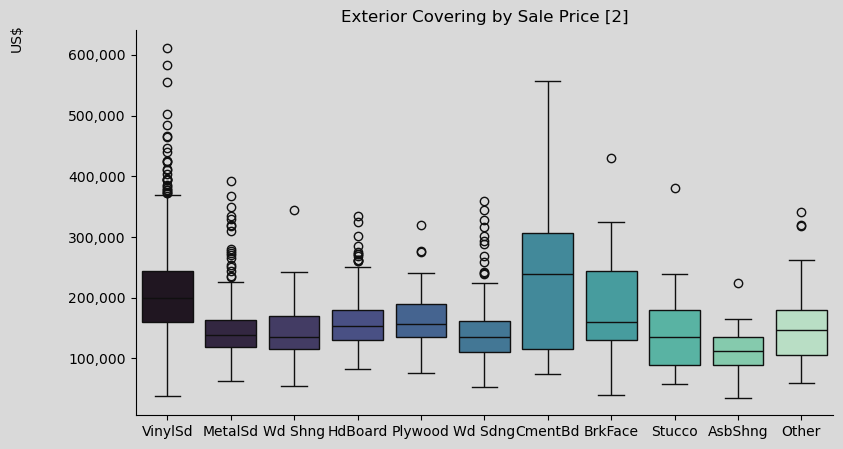


Correlation: 0.389906768677509


In [129]:
PlotBoxPlotV2(HousePricesDF['Exterior2nd'], HousePricesDF['SalePrice'], "Exterior Covering by Sale Price [2]", "US$", 9, 5)
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Exterior2nd_E']))

In [130]:
HousePricesDF['Exterior2nd'] = HousePricesDF['Exterior2nd_E'].copy()
HousePricesDF = HousePricesDF.drop('Exterior2nd_E', axis = 1)

#### **MasVnrType**

In [132]:
HousePricesDF['MasVnrType'].value_counts(normalize=True) * 100

MasVnrType
BrkFace    75.719424
Stone      21.762590
BrkCmn      2.517986
Name: proportion, dtype: float64

In [133]:
KFTE(HousePricesDF, HousePricesDF_test, 'MasVnrType', 'SalePrice')

<Figure size 600x500 with 0 Axes>

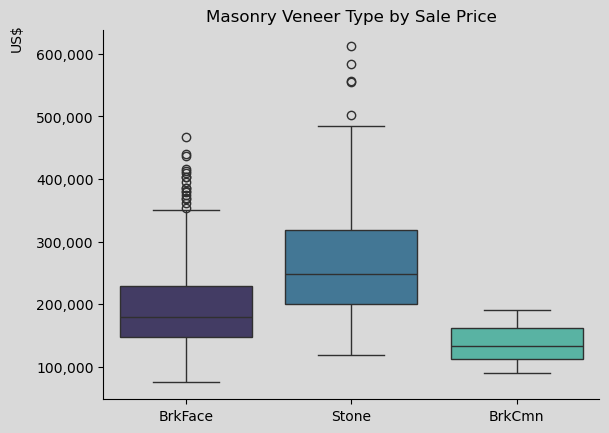


Correlation: 0.449379577748107


In [134]:
PlotBoxPlot(HousePricesDF['MasVnrType'], HousePricesDF['SalePrice'], "Masonry Veneer Type by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['MasVnrType_E']))

In [135]:
HousePricesDF['MasVnrType'] = HousePricesDF['MasVnrType_E'].copy()
HousePricesDF = HousePricesDF.drop('MasVnrType_E', axis = 1)

#### **MasVnrArea**

<Figure size 600x500 with 0 Axes>

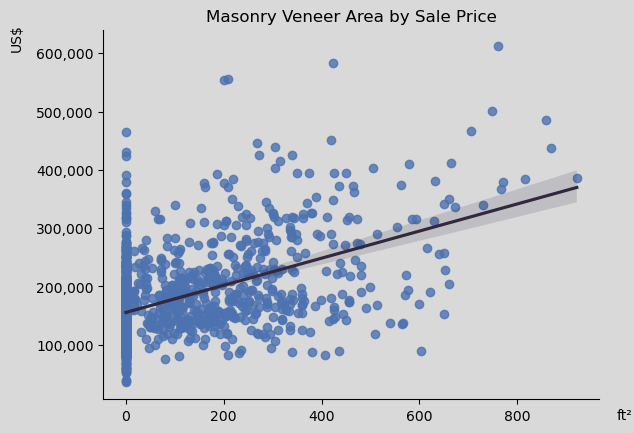


Correlation: 0.48788397373934833


In [137]:
PlotRegPlot(HousePricesDF['MasVnrArea'], HousePricesDF['SalePrice'], "Masonry Veneer Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['MasVnrArea']))

#### **ExterQual**

In [139]:
HousePricesDF['ExterQual'].value_counts(normalize=True) * 100

ExterQual
TA    62.949640
Gd    33.021583
Ex     3.237410
Fa     0.791367
Name: proportion, dtype: float64

In [140]:
HousePricesDF['ExterQual'] = HousePricesDF['ExterQual'].replace({"Ex": "Other", "Fa": "Other"})
HousePricesDF_test['ExterQual'] = HousePricesDF_test['ExterQual'].replace({"Ex": "Other", "Fa": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'ExterQual', 'SalePrice')

<Figure size 600x500 with 0 Axes>

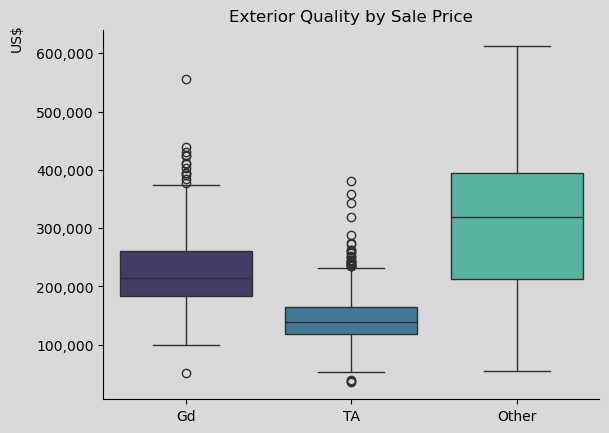


Correlation: 0.6446423134754106


In [141]:
PlotBoxPlot(HousePricesDF['ExterQual'], HousePricesDF['SalePrice'], "Exterior Quality by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['ExterQual_E']))

In [142]:
HousePricesDF['ExterQual'] = HousePricesDF['ExterQual_E'].copy()
HousePricesDF = HousePricesDF.drop('ExterQual_E', axis = 1)

#### **ExterCond**

In [144]:
HousePricesDF['ExterCond'].value_counts(normalize=True) * 100

ExterCond
TA    87.913669
Gd     9.928058
Fa     1.942446
Ex     0.143885
Po     0.071942
Name: proportion, dtype: float64

In [145]:
HousePricesDF['ExterCond'] = HousePricesDF['ExterCond'].replace({"Ex": "Other", "Po": "Other"})
HousePricesDF_test['ExterCond'] = HousePricesDF_test['ExterCond'].replace({"Ex": "Other", "Po": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'ExterCond', 'SalePrice')

<Figure size 600x500 with 0 Axes>

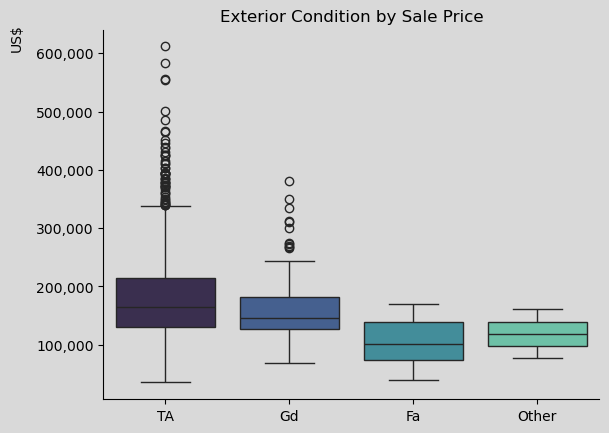


Correlation: 0.14872994381559138


In [146]:
PlotBoxPlot(HousePricesDF['ExterCond'], HousePricesDF['SalePrice'], "Exterior Condition by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['ExterCond_E']))

In [147]:
HousePricesDF['ExterCond'] = HousePricesDF['ExterCond_E'].copy()
HousePricesDF = HousePricesDF.drop('ExterCond_E', axis = 1)

#### **Foundation**

In [149]:
HousePricesDF['Foundation'].value_counts(normalize=True) * 100

Foundation
PConc     44.388489
CBlock    43.309353
BrkTil    10.071942
Slab       1.654676
Stone      0.359712
Wood       0.215827
Name: proportion, dtype: float64

In [150]:
HousePricesDF['Foundation'] = HousePricesDF['Foundation'].replace({"Slab": "Other", "Stone": "Other", "Wood": "Other"})
HousePricesDF_test['Foundation'] = HousePricesDF_test['Foundation'].replace({"Slab": "Other", "Stone": "Other", "Wood": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'Foundation', 'SalePrice')

<Figure size 600x500 with 0 Axes>

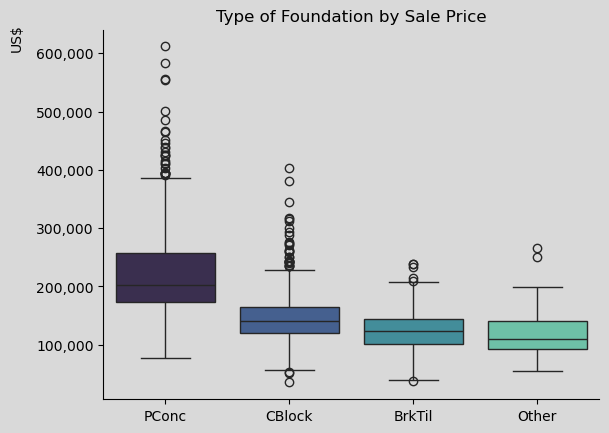


Correlation: 0.5376167484551689


In [151]:
PlotBoxPlot(HousePricesDF['Foundation'], HousePricesDF['SalePrice'], "Type of Foundation by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Foundation_E']))

In [152]:
HousePricesDF['Foundation'] = HousePricesDF['Foundation_E'].copy()
HousePricesDF = HousePricesDF.drop('Foundation_E', axis = 1)

#### **BsmtQual**

In [154]:
HousePricesDF['BsmtQual'].value_counts(normalize=True) * 100

BsmtQual
TA    46.011817
Gd    43.205318
Ex     8.197932
Fa     2.584934
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

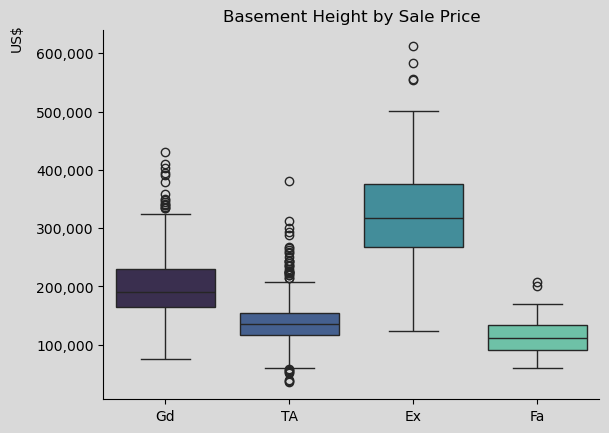


Correlation: 0.691741516246944


In [155]:
KFTE(HousePricesDF, HousePricesDF_test, 'BsmtQual', 'SalePrice')

PlotBoxPlot(HousePricesDF['BsmtQual'], HousePricesDF['SalePrice'], "Basement Height by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtQual_E']))

In [156]:
HousePricesDF['BsmtQual'] = HousePricesDF['BsmtQual_E'].copy()
HousePricesDF = HousePricesDF.drop('BsmtQual_E', axis = 1)

#### **BsmtCond**

In [158]:
HousePricesDF['BsmtCond'].value_counts(normalize=True) * 100

BsmtCond
TA    92.245199
Gd     4.431315
Fa     3.175775
Po     0.147710
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

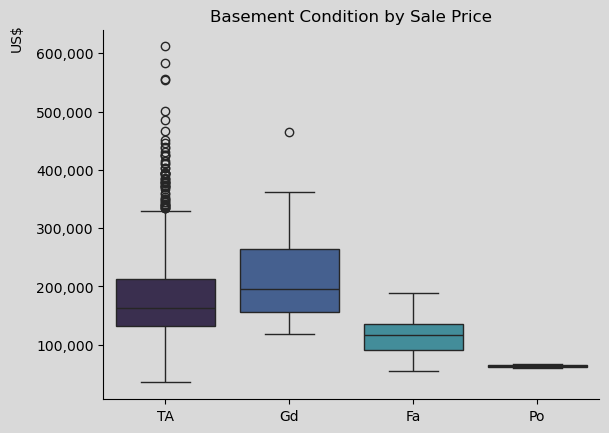


Correlation: 0.1817546662755114


In [159]:
KFTE(HousePricesDF, HousePricesDF_test, 'BsmtCond', 'SalePrice')

PlotBoxPlot(HousePricesDF['BsmtCond'], HousePricesDF['SalePrice'], "Basement Condition by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtCond_E']))

In [160]:
HousePricesDF['BsmtCond'] = HousePricesDF['BsmtCond_E'].copy()
HousePricesDF = HousePricesDF.drop('BsmtCond_E', axis = 1)

#### **BsmtExposure**

In [162]:
HousePricesDF['BsmtExposure'].value_counts(normalize=True) * 100

BsmtExposure
No    68.020679
Av    15.435746
Gd     8.345643
Mn     8.197932
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

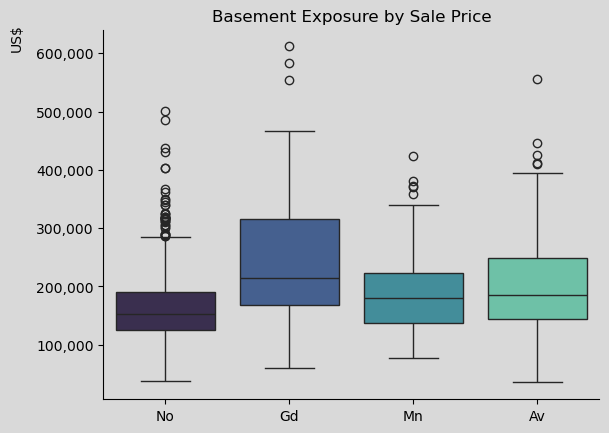


Correlation: 0.335167731365545


In [163]:
KFTE(HousePricesDF, HousePricesDF_test, 'BsmtExposure', 'SalePrice')

PlotBoxPlot(HousePricesDF['BsmtExposure'], HousePricesDF['SalePrice'], "Basement Exposure by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtExposure_E']))

In [164]:
HousePricesDF['BsmtExposure'] = HousePricesDF['BsmtExposure_E'].copy()
HousePricesDF = HousePricesDF.drop('BsmtExposure_E', axis = 1)

#### **BsmtFinType1**

In [166]:
HousePricesDF['BsmtFinType1'].value_counts(normalize=True) * 100

BsmtFinType1
Unf    30.428360
GLQ    28.951256
ALQ    15.509601
BLQ    10.413589
Rec     9.601182
LwQ     5.096012
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

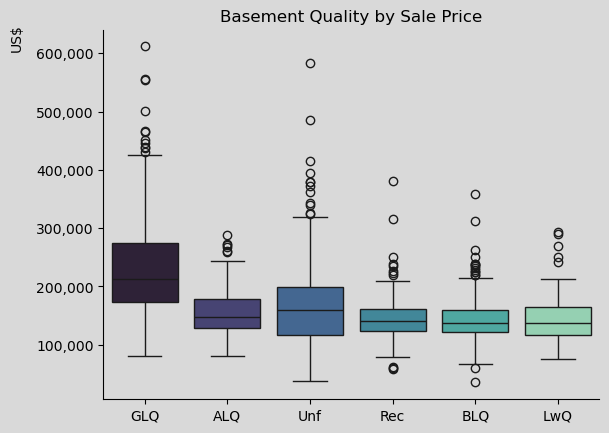


Correlation: 0.46139541403015794


In [167]:
KFTE(HousePricesDF, HousePricesDF_test, 'BsmtFinType1', 'SalePrice')

PlotBoxPlot(HousePricesDF['BsmtFinType1'], HousePricesDF['SalePrice'], "Basement Quality by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtFinType1_E']))

In [168]:
HousePricesDF['BsmtFinType1'] = HousePricesDF['BsmtFinType1_E'].copy()
HousePricesDF = HousePricesDF.drop('BsmtFinType1_E', axis = 1)

#### **BsmtFinSF1**

<Figure size 600x500 with 0 Axes>

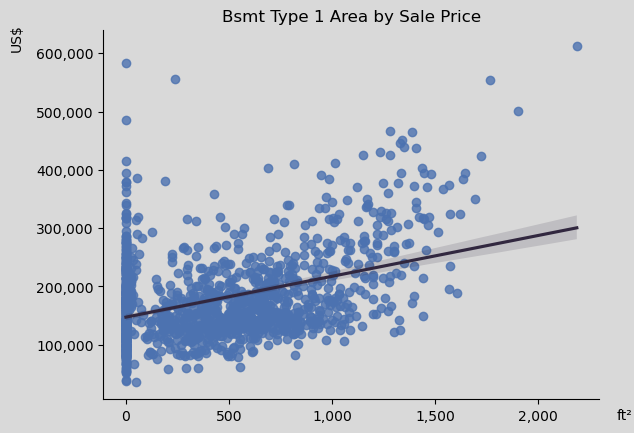


Correlation: 0.39968671333543726


In [170]:
PlotRegPlot(HousePricesDF['BsmtFinSF1'], HousePricesDF['SalePrice'], "Bsmt Type 1 Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtFinSF1']))

#### **BsmtFinType2**

In [172]:
HousePricesDF['BsmtFinType2'].value_counts(normalize=True) * 100

BsmtFinType2
Unf    88.626292
Rec     3.692762
LwQ     3.101920
BLQ     2.215657
ALQ     1.329394
GLQ     1.033973
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

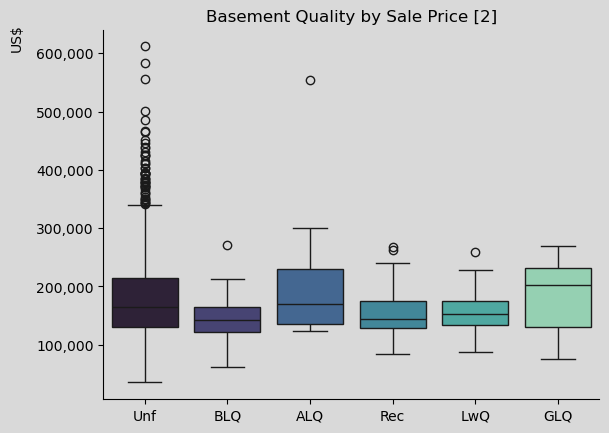


Correlation: 0.08086288584802434


In [173]:
KFTE(HousePricesDF, HousePricesDF_test, 'BsmtFinType2', 'SalePrice')

PlotBoxPlot(HousePricesDF['BsmtFinType2'], HousePricesDF['SalePrice'], "Basement Quality by Sale Price [2]", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtFinType2_E']))

In [174]:
HousePricesDF['BsmtFinType2'] = HousePricesDF['BsmtFinType2_E'].copy()
HousePricesDF = HousePricesDF.drop('BsmtFinType2_E', axis = 1)

#### **BsmtFinSF2**

<Figure size 600x500 with 0 Axes>

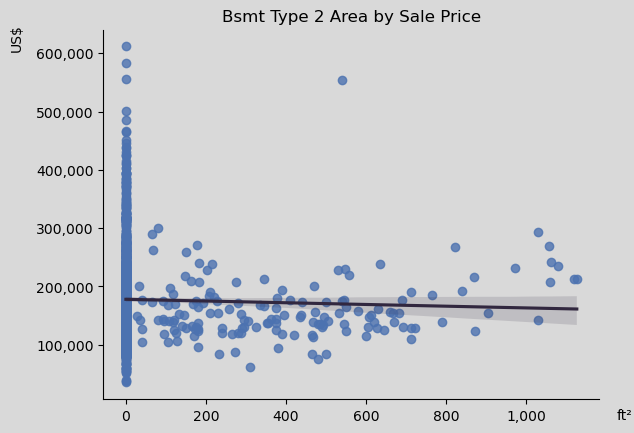


Correlation: -0.03077298965290362


In [176]:
PlotRegPlot(HousePricesDF['BsmtFinSF2'], HousePricesDF['SalePrice'], "Bsmt Type 2 Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtFinSF2']))

In [177]:
HousePricesDF = HousePricesDF.drop('BsmtFinSF2', axis = 1)

In [178]:
HousePricesDF_test = HousePricesDF_test.drop('BsmtFinSF2', axis = 1)

#### **BsmtUnfSF**

<Figure size 600x500 with 0 Axes>

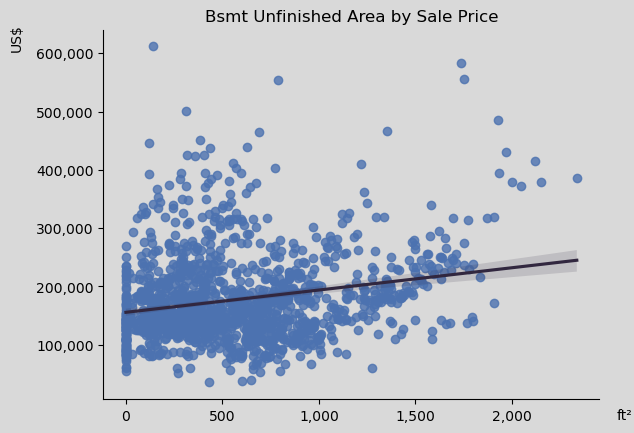


Correlation: 0.2267222896349557


In [180]:
PlotRegPlot(HousePricesDF['BsmtUnfSF'], HousePricesDF['SalePrice'], "Bsmt Unfinished Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtUnfSF']))

#### **TotalBsmtSF**

<Figure size 600x500 with 0 Axes>

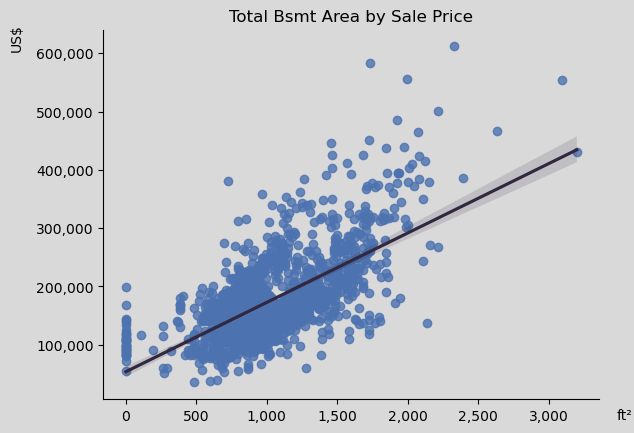


Correlation: 0.6509469191070193


In [182]:
PlotRegPlot(HousePricesDF['TotalBsmtSF'], HousePricesDF['SalePrice'], "Total Bsmt Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['TotalBsmtSF']))

#### **Heating**

In [184]:
HousePricesDF['Heating'].value_counts(normalize=True) * 100

Heating
GasA     97.913669
GasW      1.079137
Grav      0.503597
Wall      0.287770
OthW      0.143885
Floor     0.071942
Name: proportion, dtype: float64

In [185]:
HousePricesDF['Heating'] = HousePricesDF['Heating'].replace({"GasA": 1, "GasW": 0, "Grav": 0, "Wall": 0, "OthW": 0, "Floor": 0})
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Heating']))

Correlation: 0.12412799265121939


In [186]:
HousePricesDF_test['Heating'] = HousePricesDF_test['Heating'].replace({"GasA": 1, "GasW": 0, "Grav": 0, "Wall": 0, "OthW": 0, "Floor": 0})
HousePricesDF_test = HousePricesDF_test.rename(columns = {"Heating": "Heating_GasA"})

HousePricesDF = HousePricesDF.rename(columns = {"Heating": "Heating_GasA"})

#### **HeatingQC**

In [188]:
HousePricesDF['HeatingQC'].value_counts(normalize=True) * 100

HeatingQC
Ex    50.863309
TA    29.064748
Gd    16.546763
Fa     3.453237
Po     0.071942
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

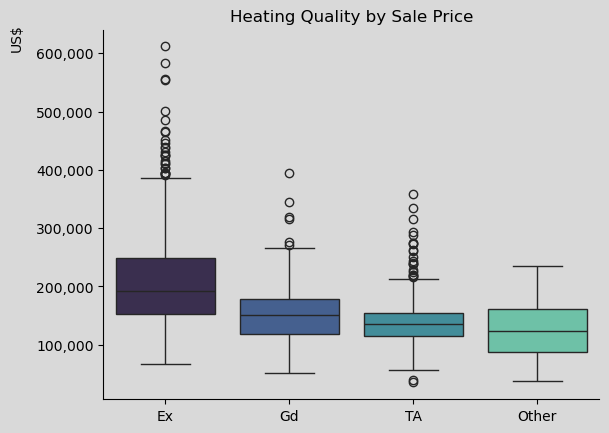


Correlation: 0.4560300417995194


In [189]:
HousePricesDF['HeatingQC'] = HousePricesDF['HeatingQC'].replace({"Fa": "Other", "Po": "Other"})
HousePricesDF_test['HeatingQC'] = HousePricesDF_test['HeatingQC'].replace({"Fa": "Other", "Po": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'HeatingQC', 'SalePrice')

PlotBoxPlot(HousePricesDF['HeatingQC'], HousePricesDF['SalePrice'], "Heating Quality by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['HeatingQC_E']))

In [190]:
HousePricesDF['HeatingQC'] = HousePricesDF['HeatingQC_E'].copy()
HousePricesDF = HousePricesDF.drop('HeatingQC_E', axis = 1)

#### **CentralAir**

In [192]:
HousePricesDF['CentralAir'].value_counts(normalize=True) * 100

CentralAir
Y    93.453237
N     6.546763
Name: proportion, dtype: float64

In [193]:
HousePricesDF['CentralAir'] = HousePricesDF['CentralAir'].replace({"Y": 1, "N": 0})
HousePricesDF_test['CentralAir'] = HousePricesDF_test['CentralAir'].replace({"Y": 1, "N": 0})

print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['CentralAir']))

Correlation: 0.2593119960641167


#### **Electrical**

In [195]:
HousePricesDF['Electrical'].value_counts(normalize=True) * 100

Electrical
SBrkr    91.366906
FuseA     6.474820
FuseF     1.870504
FuseP     0.215827
Mix       0.071942
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

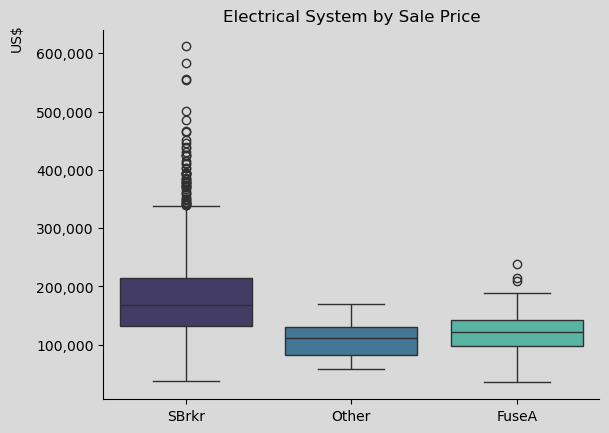


Correlation: 0.24240976002778541


In [196]:
HousePricesDF['Electrical'] = HousePricesDF['Electrical'].replace({"FuseF": "Other", "FuseP": "Other", "Mix": "Other"})
HousePricesDF_test['Electrical'] = HousePricesDF_test['Electrical'].replace({"FuseF": "Other", "FuseP": "Other", "Mix": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'Electrical', 'SalePrice')

PlotBoxPlot(HousePricesDF['Electrical'], HousePricesDF['SalePrice'], "Electrical System by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Electrical_E']))

In [197]:
HousePricesDF['Electrical'] = HousePricesDF['Electrical_E'].copy()
HousePricesDF = HousePricesDF.drop('Electrical_E', axis = 1)

#### **1stFlrSF**

<Figure size 600x500 with 0 Axes>

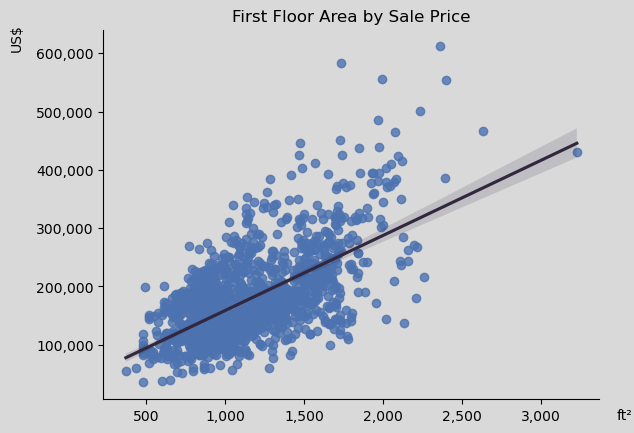


Correlation: 0.6281060818153046


In [199]:
PlotRegPlot(HousePricesDF['1stFlrSF'], HousePricesDF['SalePrice'], "First Floor Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['1stFlrSF']))

#### **2ndFlrSF**

<Figure size 600x500 with 0 Axes>

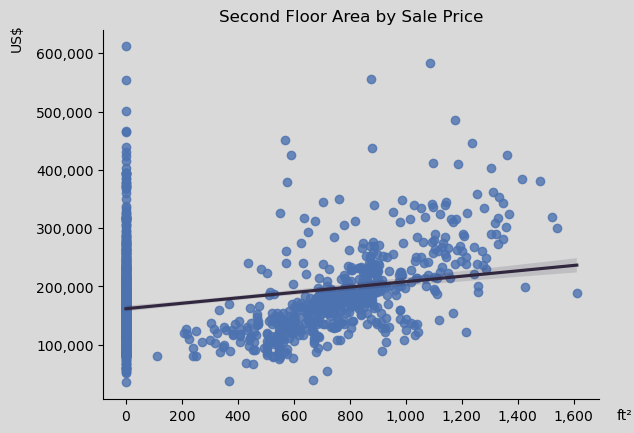


Correlation: 0.26262063048839485


In [201]:
PlotRegPlot(HousePricesDF['2ndFlrSF'], HousePricesDF['SalePrice'], "Second Floor Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['2ndFlrSF']))

#### **LowQualFinSF**

<Figure size 600x500 with 0 Axes>

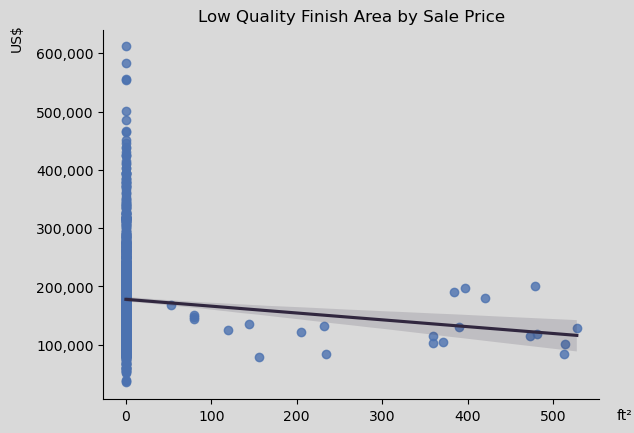


Correlation: -0.0701238008120736


In [203]:
PlotRegPlot(HousePricesDF['LowQualFinSF'], HousePricesDF['SalePrice'], "Low Quality Finish Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['LowQualFinSF']))

In [204]:
HousePricesDF['HasLowQualFin'] = HousePricesDF['LowQualFinSF'].map({0: 0}).fillna(1)
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['HasLowQualFin']))

Correlation: -0.07787996711029264


In [205]:
HousePricesDF = HousePricesDF.drop(columns = {'LowQualFinSF', 'HasLowQualFin'}, axis = 1)

In [206]:
HousePricesDF_test = HousePricesDF_test.drop('LowQualFinSF', axis = 1)

#### **GrLivArea**

<Figure size 600x500 with 0 Axes>

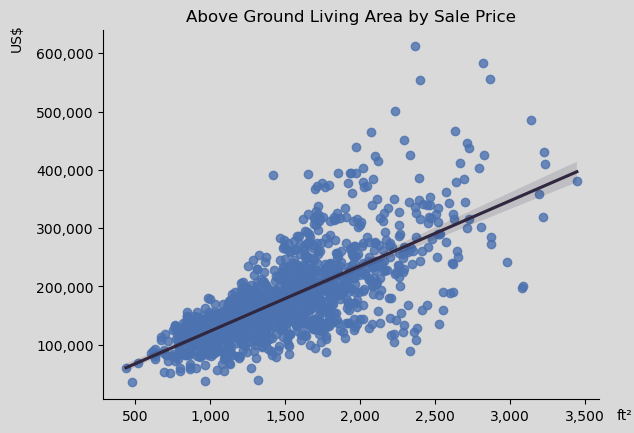


Correlation: 0.7097681910320878


In [208]:
PlotRegPlot(HousePricesDF['GrLivArea'], HousePricesDF['SalePrice'], "Above Ground Living Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GrLivArea']))

#### **BsmtFullBath**

<Figure size 600x500 with 0 Axes>

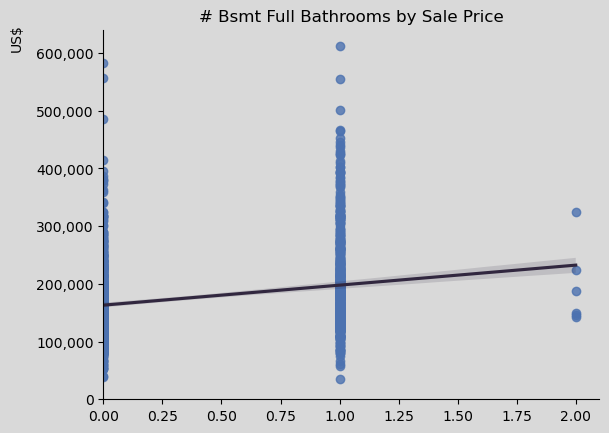


Correlation: 0.23503431496990213


In [210]:
PlotRegPlot2(HousePricesDF['BsmtFullBath'], HousePricesDF['SalePrice'], "# Bsmt Full Bathrooms by Sale Price")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtFullBath']))

#### **BsmtHalfBath**

<Figure size 600x500 with 0 Axes>

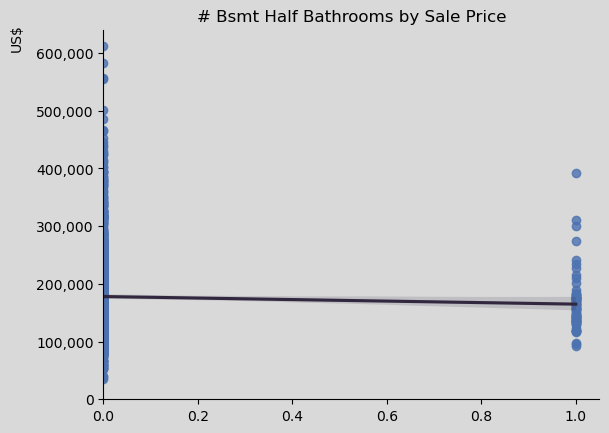


Correlation: -0.040002894382001775


In [212]:
PlotRegPlot2(HousePricesDF['BsmtHalfBath'], HousePricesDF['SalePrice'], "# Bsmt Half Bathrooms by Sale Price")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BsmtHalfBath']))

#### **FullBath**

<Figure size 600x500 with 0 Axes>

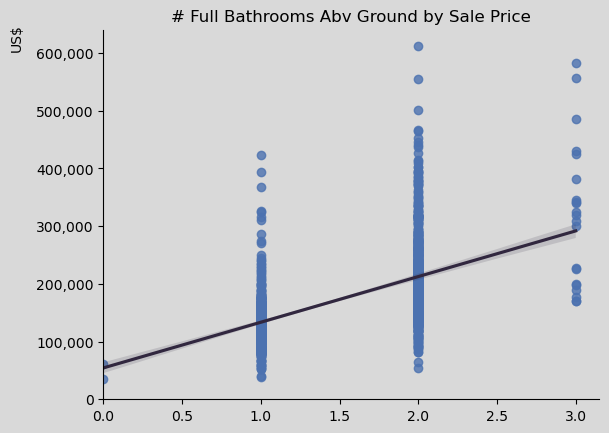


Correlation: 0.56733383812428


In [214]:
PlotRegPlot2(HousePricesDF['FullBath'], HousePricesDF['SalePrice'], "# Full Bathrooms Abv Ground by Sale Price")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['FullBath']))

#### **HalfBath**

<Figure size 600x500 with 0 Axes>

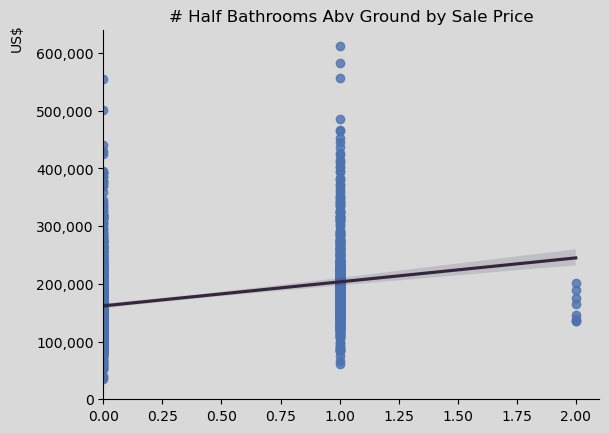


Correlation: 0.2786499722484795


In [216]:
PlotRegPlot2(HousePricesDF['HalfBath'], HousePricesDF['SalePrice'], "# Half Bathrooms Abv Ground by Sale Price")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['HalfBath']))

#### **BedroomAbvGr**

<Figure size 600x500 with 0 Axes>

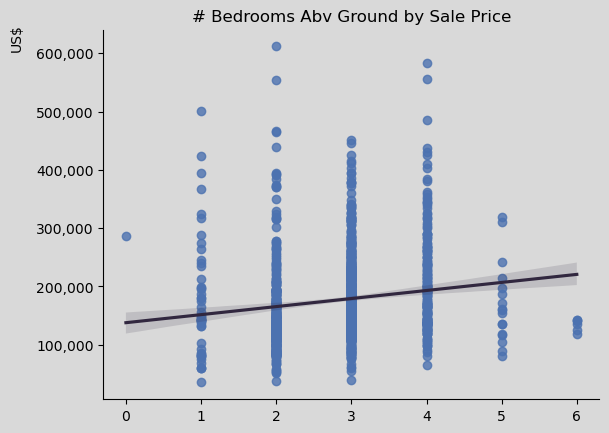


Correlation: 0.14530911316964867


In [218]:
PlotRegPlot(HousePricesDF['BedroomAbvGr'], HousePricesDF['SalePrice'], "# Bedrooms Abv Ground by Sale Price", "", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BedroomAbvGr']))

#### **KitchenAbvGr**

<Figure size 600x500 with 0 Axes>

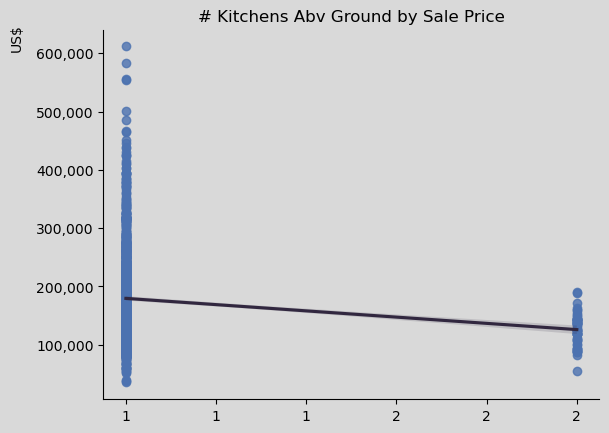


Correlation: -0.14506160844504606


In [220]:
PlotRegPlot(HousePricesDF['KitchenAbvGr'], HousePricesDF['SalePrice'], "# Kitchens Abv Ground by Sale Price", "", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['KitchenAbvGr']))

#### **KitchenQual**

In [222]:
HousePricesDF['KitchenQual'].value_counts(normalize=True) * 100

KitchenQual
TA    50.719424
Gd    40.071942
Ex     6.546763
Fa     2.661871
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

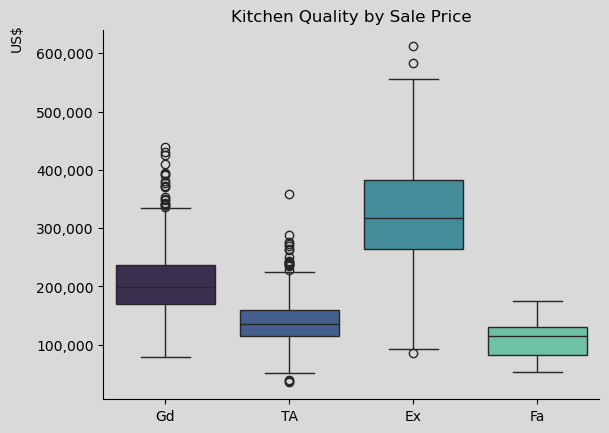


Correlation: 0.6892906801284514


In [223]:
KFTE(HousePricesDF, HousePricesDF_test, 'KitchenQual', 'SalePrice')

PlotBoxPlot(HousePricesDF['KitchenQual'], HousePricesDF['SalePrice'], "Kitchen Quality by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['KitchenQual_E']))

In [224]:
HousePricesDF['KitchenQual'] = HousePricesDF['KitchenQual_E'].copy()
HousePricesDF = HousePricesDF.drop('KitchenQual_E', axis = 1)

#### **TotRmsAbvGrd**

<Figure size 600x500 with 0 Axes>

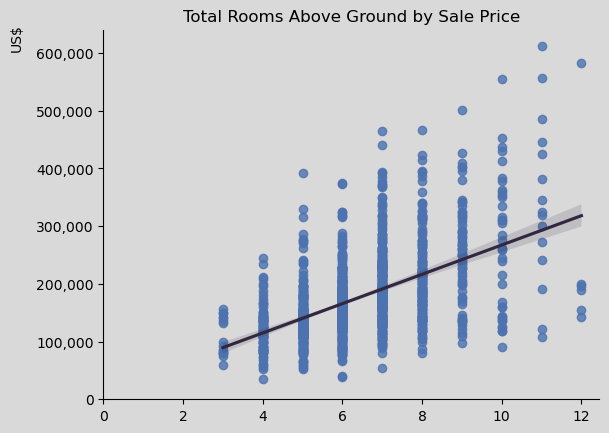


Correlation: 0.5322742471296078


In [226]:
PlotRegPlot2(HousePricesDF['TotRmsAbvGrd'], HousePricesDF['SalePrice'], "Total Rooms Above Ground by Sale Price")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['TotRmsAbvGrd']))

#### **Functional**

In [228]:
HousePricesDF['Functional'].value_counts(normalize=True) * 100

Functional
Typ     93.237410
Min2     2.446043
Min1     2.086331
Mod      0.935252
Maj1     0.863309
Maj2     0.359712
Sev      0.071942
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

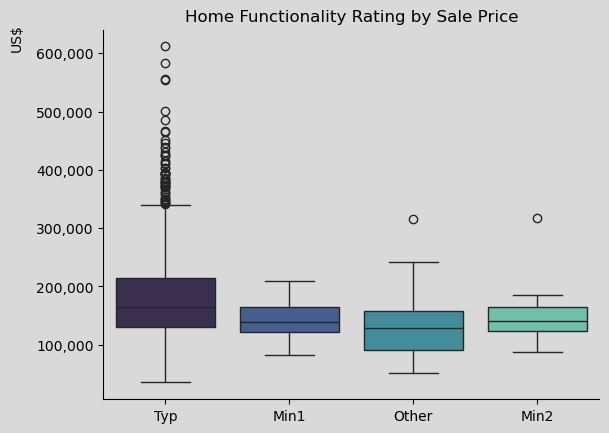


Correlation: 0.1273053457354662


In [229]:
HousePricesDF['Functional'] = HousePricesDF['Functional'].replace({"Mod": "Other", "Maj1": "Other", "Maj2": "Other", "Sev": "Other"})
HousePricesDF_test['Functional'] = HousePricesDF_test['Functional'].replace({"Mod": "Other", "Maj1": "Other", "Maj2": "Other", "Sev": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'Functional', 'SalePrice')

PlotBoxPlot(HousePricesDF['Functional'], HousePricesDF['SalePrice'], "Home Functionality Rating by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Functional_E']))

In [230]:
HousePricesDF['Functional'] = HousePricesDF['Functional_E'].copy()
HousePricesDF = HousePricesDF.drop('Functional_E', axis = 1)

#### **Fireplaces**

<Figure size 600x500 with 0 Axes>

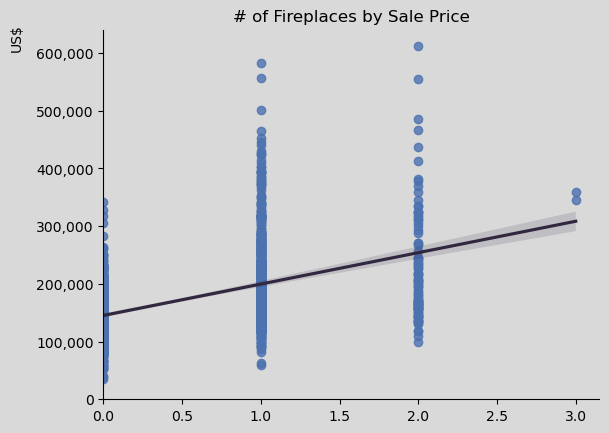


Correlation: 0.46202900682261994


In [232]:
PlotRegPlot2(HousePricesDF['Fireplaces'], HousePricesDF['SalePrice'], "# of Fireplaces by Sale Price")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['Fireplaces']))

#### **FireplaceQu**

In [234]:
HousePricesDF['FireplaceQu'].value_counts(normalize=True) * 100

FireplaceQu
Gd    49.511855
TA    40.585774
Fa     4.184100
Ex     2.928870
Po     2.789400
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

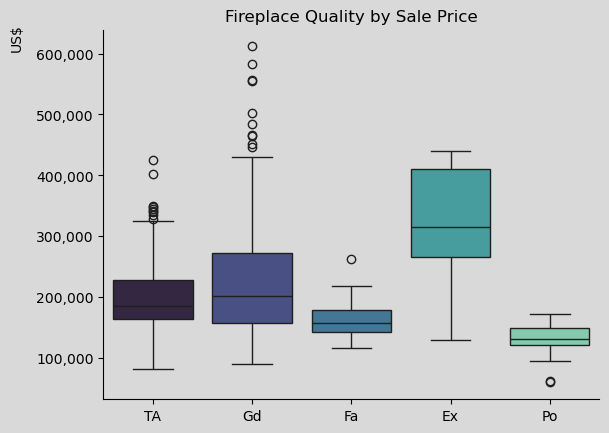


Correlation: 0.4965278933420944


In [235]:
KFTE(HousePricesDF, HousePricesDF_test, 'FireplaceQu', 'SalePrice')

PlotBoxPlot(HousePricesDF['FireplaceQu'], HousePricesDF['SalePrice'], "Fireplace Quality by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['FireplaceQu_E']))

In [236]:
HousePricesDF['FireplaceQu'] = HousePricesDF['FireplaceQu_E'].copy()
HousePricesDF = HousePricesDF.drop('FireplaceQu_E', axis = 1)

#### **GarageType**

In [238]:
HousePricesDF['GarageType'].value_counts(normalize=True) * 100

GarageType
Attchd     63.117871
Detchd     28.212928
BuiltIn     6.235741
Basment     1.444867
CarPort     0.608365
2Types      0.380228
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

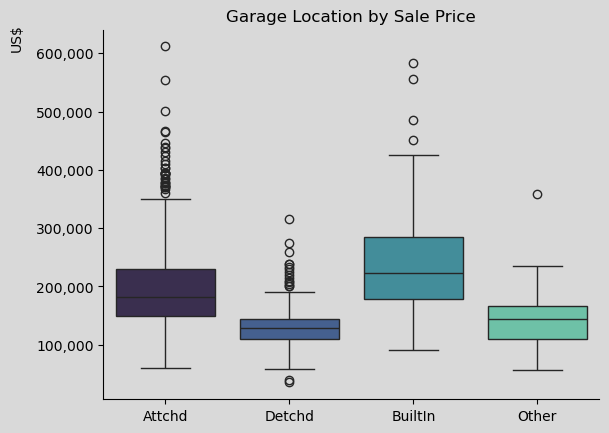


Correlation: 0.45827883573184386


In [239]:
HousePricesDF['GarageType'] = HousePricesDF['GarageType'].replace({"Basment": "Other", "CarPort": "Other", "2Types": "Other"})
HousePricesDF_test['GarageType'] = HousePricesDF_test['GarageType'].replace({"Basment": "Other", "CarPort": "Other", "2Types": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'GarageType', 'SalePrice')

PlotBoxPlot(HousePricesDF['GarageType'], HousePricesDF['SalePrice'], "Garage Location by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GarageType_E']))

In [240]:
HousePricesDF['GarageType'] = HousePricesDF['GarageType_E'].copy()
HousePricesDF = HousePricesDF.drop('GarageType_E', axis = 1)

#### **GarageYrBlt**

<Figure size 600x500 with 0 Axes>

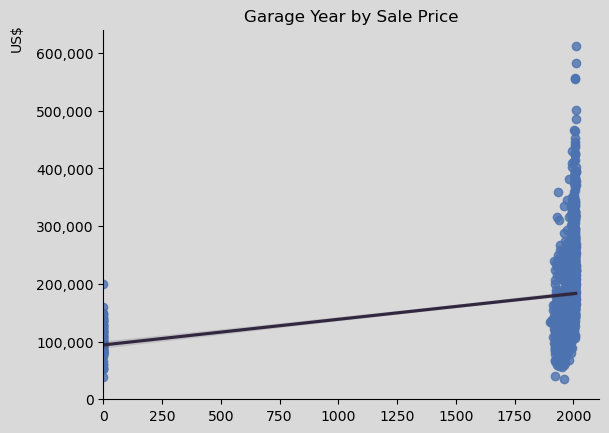

Correlation: 0.2693150611975561


In [242]:
PlotRegPlot2(HousePricesDF['GarageYrBlt'], HousePricesDF['SalePrice'], "Garage Year by Sale Price")
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GarageYrBlt']))

#### **GarageFinish**

In [244]:
HousePricesDF['GarageFinish'].value_counts(normalize=True) * 100

GarageFinish
Unf    44.334601
RFn    31.026616
Fin    24.638783
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

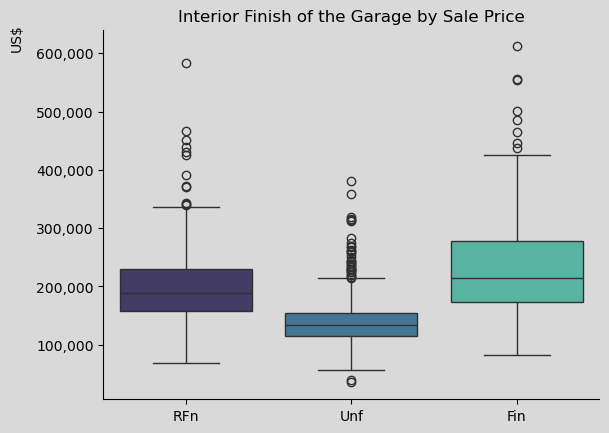


Correlation: 0.524283777824247


In [245]:
KFTE(HousePricesDF, HousePricesDF_test, 'GarageFinish', 'SalePrice')

PlotBoxPlot(HousePricesDF['GarageFinish'], HousePricesDF['SalePrice'], "Interior Finish of the Garage by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GarageFinish_E']))

In [246]:
HousePricesDF['GarageFinish'] = HousePricesDF['GarageFinish_E'].copy()
HousePricesDF = HousePricesDF.drop('GarageFinish_E', axis = 1)

#### **GarageCars**

<Figure size 600x500 with 0 Axes>

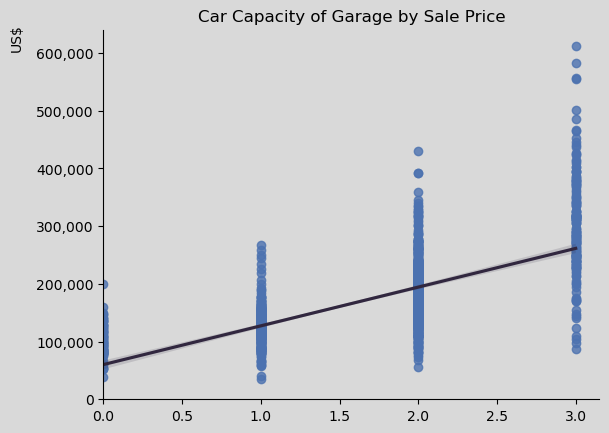

Correlation: 0.6629779953288079


In [248]:
PlotRegPlot2(HousePricesDF['GarageCars'], HousePricesDF['SalePrice'], "Car Capacity of Garage by Sale Price")
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GarageCars']))

#### **GarageArea**

<Figure size 600x500 with 0 Axes>

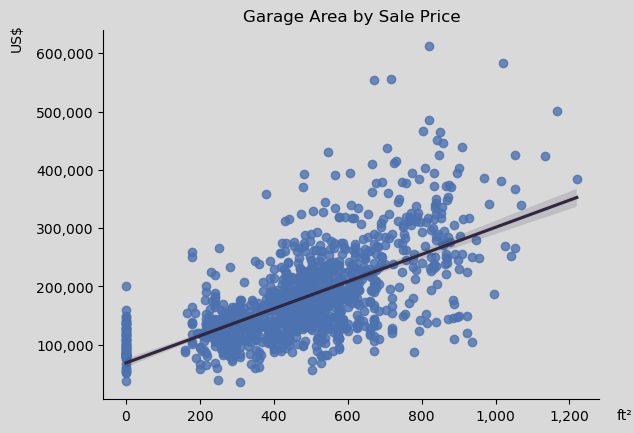


Correlation: 0.6503799551667392


In [250]:
PlotRegPlot(HousePricesDF['GarageArea'], HousePricesDF['SalePrice'], "Garage Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GarageArea']))

#### **GarageQual**

In [252]:
HousePricesDF['GarageQual'].value_counts(normalize=True) * 100

GarageQual
TA    95.285171
Fa     3.346008
Gd     0.988593
Po     0.228137
Ex     0.152091
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

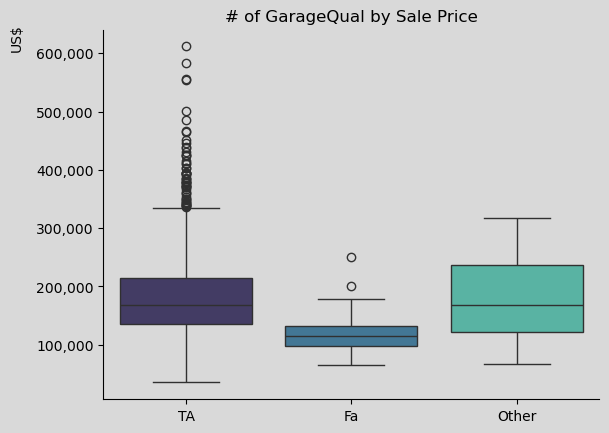


Correlation: 0.16866705533472004


In [253]:
HousePricesDF['GarageQual'] = HousePricesDF['GarageQual'].replace({"Gd": "Other", "Po": "Other", "Ex": "Other"})
HousePricesDF_test['GarageQual'] = HousePricesDF_test['GarageQual'].replace({"Gd": "Other", "Po": "Other", "Ex": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'GarageQual', 'SalePrice')

PlotBoxPlot(HousePricesDF['GarageQual'], HousePricesDF['SalePrice'], "# of GarageQual by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GarageQual_E']))

In [254]:
HousePricesDF['GarageQual'] = HousePricesDF['GarageQual_E'].copy()
HousePricesDF = HousePricesDF.drop('GarageQual_E', axis = 1)

#### **GarageCond**

In [256]:
HousePricesDF['GarageCond'].value_counts(normalize=True) * 100

GarageCond
TA    96.045627
Fa     2.661597
Gd     0.684411
Po     0.456274
Ex     0.152091
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

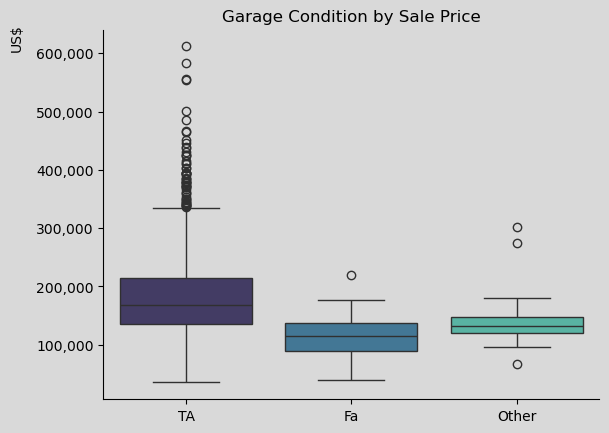


Correlation: 0.16852589020181769


In [257]:
HousePricesDF['GarageCond'] = HousePricesDF['GarageCond'].replace({"Gd": "Other", "Po": "Other", "Ex": "Other"})
HousePricesDF_test['GarageCond'] = HousePricesDF_test['GarageCond'].replace({"Gd": "Other", "Po": "Other", "Ex": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'GarageCond', 'SalePrice')

PlotBoxPlot(HousePricesDF['GarageCond'], HousePricesDF['SalePrice'], "Garage Condition by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GarageCond_E']))

In [258]:
HousePricesDF['GarageCond'] = HousePricesDF['GarageCond_E'].copy()
HousePricesDF = HousePricesDF.drop('GarageCond_E', axis = 1)

#### **PavedDrive**

In [260]:
HousePricesDF['PavedDrive'].value_counts(normalize=True) * 100

PavedDrive
Y    91.870504
N     5.971223
P     2.158273
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

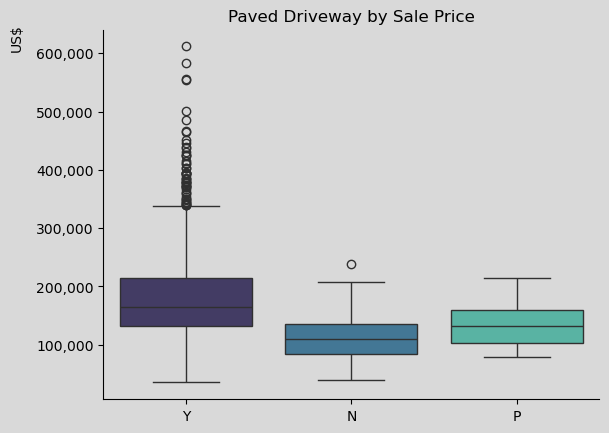


Correlation: 0.23237465465946924


In [261]:
KFTE(HousePricesDF, HousePricesDF_test, 'PavedDrive', 'SalePrice')

PlotBoxPlot(HousePricesDF['PavedDrive'], HousePricesDF['SalePrice'], "Paved Driveway by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['PavedDrive_E']))

In [262]:
HousePricesDF['PavedDrive'] = HousePricesDF['PavedDrive_E'].copy()
HousePricesDF = HousePricesDF.drop('PavedDrive_E', axis = 1)

#### **WoodDeckSF**

<Figure size 600x500 with 0 Axes>

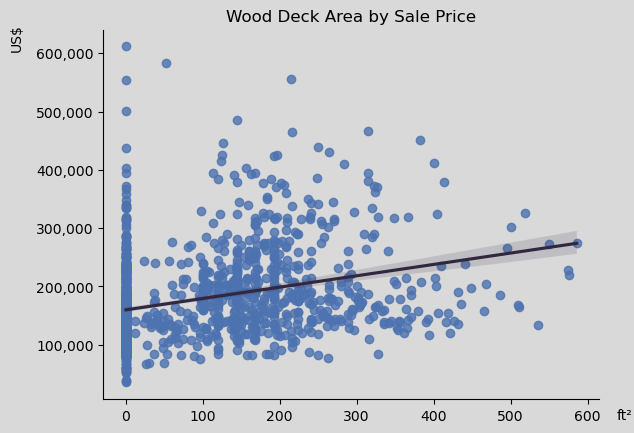


Correlation: 0.30694278500461936


In [264]:
PlotRegPlot(HousePricesDF['WoodDeckSF'], HousePricesDF['SalePrice'], "Wood Deck Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['WoodDeckSF']))

#### **OpenPorchSF**

<Figure size 600x500 with 0 Axes>

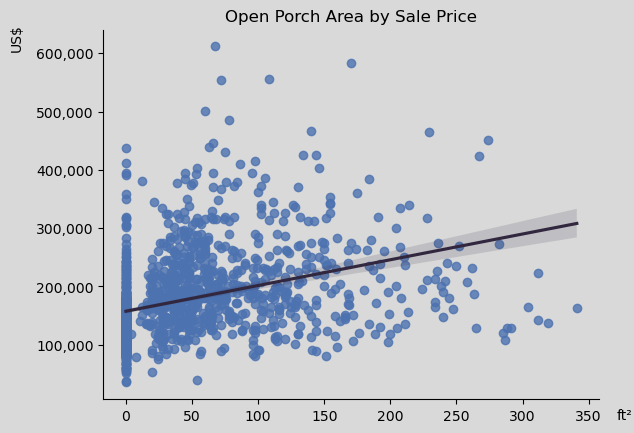


Correlation: 0.36199547975833546


In [266]:
PlotRegPlot(HousePricesDF['OpenPorchSF'], HousePricesDF['SalePrice'], "Open Porch Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['OpenPorchSF']))

#### **EnclosedPorch**

<Figure size 600x500 with 0 Axes>

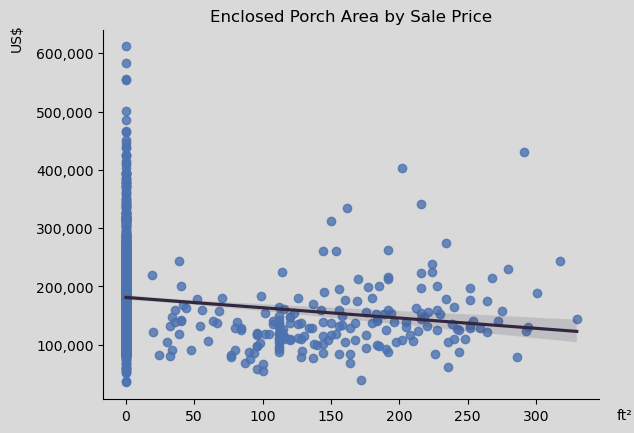


Correlation: -0.14248775088875829


In [268]:
PlotRegPlot(HousePricesDF['EnclosedPorch'], HousePricesDF['SalePrice'], "Enclosed Porch Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['EnclosedPorch']))

#### **3SsnPorch**

<Figure size 600x500 with 0 Axes>

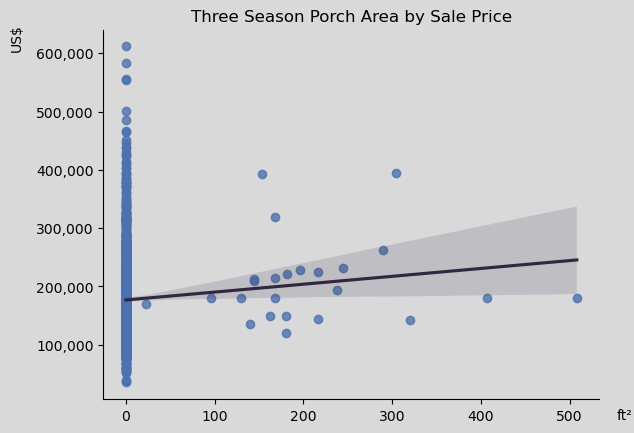


Correlation: 0.05495358627266167


In [270]:
PlotRegPlot(HousePricesDF['3SsnPorch'], HousePricesDF['SalePrice'], "Three Season Porch Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['3SsnPorch']))

#### **ScreenPorch**

<Figure size 600x500 with 0 Axes>

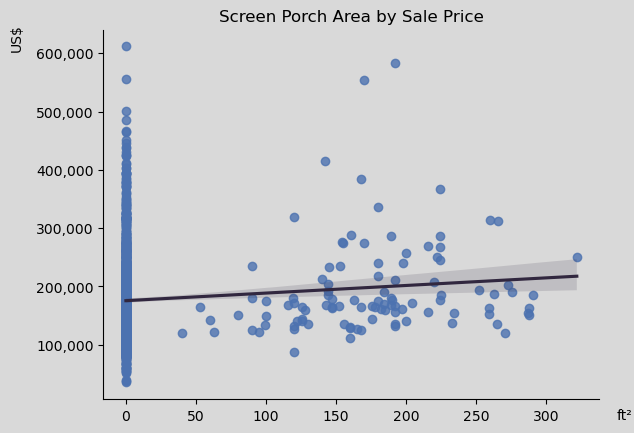


Correlation: 0.08634732781163809


In [272]:
PlotRegPlot(HousePricesDF['ScreenPorch'], HousePricesDF['SalePrice'], "Screen Porch Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['ScreenPorch']))

#### **PoolArea**

<Figure size 600x500 with 0 Axes>

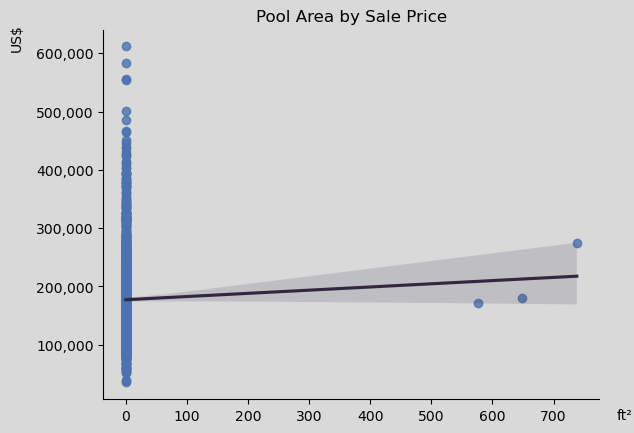


Correlation: 0.022606521211817762


In [274]:
PlotRegPlot(HousePricesDF['PoolArea'], HousePricesDF['SalePrice'], "Pool Area by Sale Price", "ft²", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['PoolArea']))

#### **PoolQC**

In [276]:
HousePricesDF['PoolQC'].value_counts(normalize=True) * 100

PoolQC
Gd    66.666667
Fa    33.333333
Name: proportion, dtype: float64

In [277]:
HousePricesDF = HousePricesDF.drop('PoolQC', axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('PoolQC', axis = 1)

#### **YrSold**

In [279]:
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['YrSold']))


Correlation: -0.019635651221160514


#### **SaleType**

In [281]:
HousePricesDF['SaleType'].value_counts(normalize=True) * 100

SaleType
WD       86.906475
New       8.201439
COD       2.949640
ConLD     0.575540
ConLI     0.359712
ConLw     0.359712
CWD       0.287770
Oth       0.215827
Con       0.143885
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

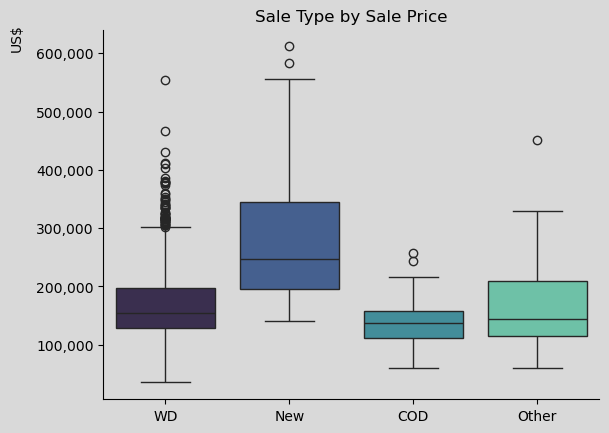


Correlation: 0.39928842028613465


In [282]:
HousePricesDF['SaleType'] = HousePricesDF['SaleType'].replace({"ConLD": "Other", "ConLI": "Other", "ConLw": "Other", "CWD": "Other", "Oth": "Other", "Con": "Other"})
HousePricesDF_test['SaleType'] = HousePricesDF_test['SaleType'].replace({"ConLD": "Other", "ConLI": "Other", "ConLw": "Other", "CWD": "Other", "Oth": "Other", "Con": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'SaleType', 'SalePrice')

PlotBoxPlot(HousePricesDF['SaleType'], HousePricesDF['SalePrice'], "Sale Type by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['SaleType_E']))

In [283]:
HousePricesDF['SaleType'] = HousePricesDF['SaleType_E'].copy()
HousePricesDF = HousePricesDF.drop('SaleType_E', axis = 1)

#### **SaleCondition**

In [285]:
HousePricesDF['SaleCondition'].value_counts(normalize=True) * 100

SaleCondition
Normal     82.589928
Partial     8.417266
Abnorml     6.834532
Family      1.438849
Alloca      0.503597
AdjLand     0.215827
Name: proportion, dtype: float64

<Figure size 600x500 with 0 Axes>

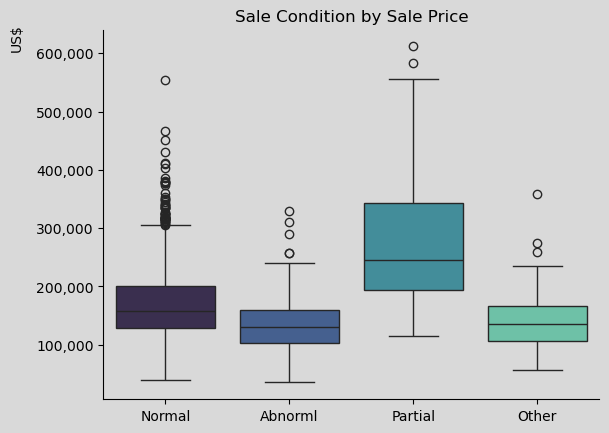


Correlation: 0.4055283077483691


In [286]:
HousePricesDF['SaleCondition'] = HousePricesDF['SaleCondition'].replace({"Family": "Other", "Alloca": "Other", "AdjLand": "Other"})
HousePricesDF_test['SaleCondition'] = HousePricesDF_test['SaleCondition'].replace({"Family": "Other", "Alloca": "Other", "AdjLand": "Other"})

KFTE(HousePricesDF, HousePricesDF_test, 'SaleCondition', 'SalePrice')

PlotBoxPlot(HousePricesDF['SaleCondition'], HousePricesDF['SalePrice'], "Sale Condition by Sale Price", "US$")
print("\nCorrelation:", HousePricesDF['SalePrice'].corr(HousePricesDF['SaleCondition_E']))

In [287]:
HousePricesDF['SaleCondition'] = HousePricesDF['SaleCondition_E'].copy()
HousePricesDF = HousePricesDF.drop('SaleCondition_E', axis = 1)

## **FEATURE ENGINEERING**

In [289]:
HousePricesDF['HouseAge'] = HousePricesDF['YrSold'] - HousePricesDF['YearBuilt']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['HouseAge']))

Correlation: -0.5754599940254934


In [290]:
HousePricesDF_test['HouseAge'] = HousePricesDF_test['YrSold'] - HousePricesDF_test['YearBuilt']

In [291]:
HousePricesDF['RemodelAge'] = HousePricesDF['YrSold'] - HousePricesDF['YearRemodAdd']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['RemodelAge']))

Correlation: -0.5347993725537701


In [292]:
HousePricesDF_test['RemodelAge'] = HousePricesDF_test['YrSold'] - HousePricesDF_test['YearRemodAdd']

In [293]:
HousePricesDF['GarageAge'] = HousePricesDF['YrSold'] - HousePricesDF['GarageYrBlt']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GarageAge']))

Correlation: -0.26936298897513494


In [294]:
HousePricesDF_test['GarageAge'] = HousePricesDF_test['YrSold'] - HousePricesDF_test['GarageYrBlt']

In [295]:
HousePricesDF['OutdoorArea'] = HousePricesDF['WoodDeckSF'] + HousePricesDF['OpenPorchSF']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['OutdoorArea']))

Correlation: 0.4274011351147879


In [296]:
HousePricesDF_test['OutdoorArea'] = HousePricesDF_test['WoodDeckSF'] + HousePricesDF_test['OpenPorchSF']

In [297]:
HousePricesDF['TotalArea'] = HousePricesDF['TotalBsmtSF'] + HousePricesDF['GrLivArea'] + HousePricesDF['GarageArea'] + HousePricesDF['OutdoorArea']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['TotalArea']))

Correlation: 0.8566956342135456


In [298]:
HousePricesDF_test['TotalArea'] = HousePricesDF_test['TotalBsmtSF'] + HousePricesDF_test['GrLivArea'] + HousePricesDF_test['GarageArea'] + HousePricesDF_test['OutdoorArea']

In [299]:
HousePricesDF['TotalBathrooms'] = HousePricesDF['BsmtFullBath'] + HousePricesDF['FullBath'] + 0.5 * (HousePricesDF['BsmtHalfBath'] + HousePricesDF['HalfBath'])
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['TotalBathrooms']))

Correlation: 0.6371585545121159


In [300]:
HousePricesDF_test['TotalBathrooms'] = HousePricesDF_test['BsmtFullBath'] + HousePricesDF_test['FullBath']\
                                          + 0.5 * (HousePricesDF_test['BsmtHalfBath'] + HousePricesDF_test['HalfBath'])

In [301]:
HousePricesDF['OverallScore'] = HousePricesDF['OverallQual'] * HousePricesDF['OverallCond']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['OverallScore']))

Correlation: 0.5552798974753965


In [302]:
HousePricesDF_test['OverallScore'] = HousePricesDF_test['OverallQual'] * HousePricesDF_test['OverallCond']

In [303]:
HousePricesDF['ExteriorScore'] = HousePricesDF['ExterQual'] * HousePricesDF['ExterCond']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['ExteriorScore']))

Correlation: 0.6649449913518136


In [304]:
HousePricesDF_test['ExteriorScore'] = HousePricesDF_test['ExterQual'] * HousePricesDF_test['ExterCond']

In [305]:
HousePricesDF['KitchenScore'] = HousePricesDF['KitchenQual'] * HousePricesDF['KitchenAbvGr']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['KitchenScore']))

Correlation: 0.5692478056999252


In [306]:
HousePricesDF_test['KitchenScore'] = HousePricesDF_test['KitchenQual'] * HousePricesDF_test['KitchenAbvGr']

In [307]:
HousePricesDF['LotFrontageRatio'] = HousePricesDF['LotFrontage'] / HousePricesDF['LotArea']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['LotFrontageRatio']))

Correlation: -0.17713069926102498


In [308]:
HousePricesDF_test['LotFrontageRatio'] = HousePricesDF_test['LotFrontage'] / HousePricesDF_test['LotArea']

In [309]:
HousePricesDF['BedroomRatio'] = HousePricesDF['BedroomAbvGr'] / HousePricesDF['TotRmsAbvGrd']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['BedroomRatio']))

Correlation: -0.3622122745873306


In [310]:
HousePricesDF_test['BedroomRatio'] = HousePricesDF_test['BedroomAbvGr'] / HousePricesDF_test['TotRmsAbvGrd']

In [311]:
HousePricesDF['HasGarage'] = HousePricesDF['GarageArea'].map({0: 0}).fillna(1)
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['HasGarage']))

Correlation: 0.24256326136297643


In [312]:
HousePricesDF_test['HasGarage'] = HousePricesDF_test['GarageArea'].map({0: 0}).fillna(1)

In [313]:
HousePricesDF['HasPool'] = HousePricesDF['PoolArea'].map({0: 0}).fillna(1)
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['HasPool']))

Correlation: 0.01993825602575935


In [314]:
HousePricesDF = HousePricesDF.drop('HasPool', axis = 1)

In [315]:
HousePricesDF['HasFireplace'] = HousePricesDF['Fireplaces'].map({0: 0}).fillna(1)
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['HasFireplace']))

Correlation: 0.47011839204573064


In [316]:
HousePricesDF_test['HasFireplace'] = HousePricesDF_test['Fireplaces'].map({0: 0}).fillna(1)

In [317]:
HousePricesDF['GarageScore'] = HousePricesDF['GarageQual'] * HousePricesDF['GarageArea']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['GarageScore']))

Correlation: 0.654406966697159


In [318]:
HousePricesDF_test['GarageScore'] = HousePricesDF_test['GarageQual'] * HousePricesDF_test['GarageArea']

In [319]:
HousePricesDF['TotalPorchArea'] = HousePricesDF['OpenPorchSF'] + HousePricesDF['EnclosedPorch'] + HousePricesDF['3SsnPorch'] + HousePricesDF['ScreenPorch']
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['TotalPorchArea']))

Correlation: 0.202557396207812


In [320]:
HousePricesDF_test['TotalPorchArea'] = HousePricesDF_test['OpenPorchSF'] + HousePricesDF_test['EnclosedPorch']\
                                          + HousePricesDF_test['3SsnPorch'] + HousePricesDF_test['ScreenPorch']

In [321]:
HousePricesDF['SeasonSold'] = HousePricesDF['MoSold'].replace({1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1})
HousePricesDF_test['SeasonSold'] = HousePricesDF_test['MoSold'].replace({1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1})

KFTE(HousePricesDF, HousePricesDF_test, 'SeasonSold', 'SalePrice')
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['SeasonSold_E']))

Correlation: 0.018272534996101517


In [322]:
HousePricesDF = HousePricesDF.drop(columns = {'SeasonSold', 'SeasonSold_E'}, axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('SeasonSold', axis = 1)

In [323]:
def DecadeBuilt(YearBuilt):
  if (YearBuilt < 1880):
    return 1870
  elif (YearBuilt < 1890):
    return 1880
  elif (YearBuilt < 1900):
    return 1890
  elif (YearBuilt < 1910):
    return 1900
  elif (YearBuilt < 1920):
    return 1910
  elif (YearBuilt < 1930):
    return 1920
  elif (YearBuilt < 1940):
    return 1930
  elif (YearBuilt < 1950):
    return 1940
  elif (YearBuilt < 1960):
    return 1950
  elif (YearBuilt < 1970):
    return 1960
  elif (YearBuilt < 1980):
    return 1970
  elif (YearBuilt < 1990):
    return 1980
  elif (YearBuilt < 2000):
    return 1990
  elif (YearBuilt < 2010):
    return 2000
  else:
    return 2010


HousePricesDF['DecadeBuilt'] = HousePricesDF['YearBuilt'].apply(DecadeBuilt)
HousePricesDF_test['DecadeBuilt'] = HousePricesDF_test['YearBuilt'].apply(DecadeBuilt)

KFTE(HousePricesDF, HousePricesDF_test, 'DecadeBuilt', 'SalePrice')
print("Correlation:", HousePricesDF['SalePrice'].corr(HousePricesDF['DecadeBuilt_E']))

Correlation: 0.6207845814087317


In [324]:
HousePricesDF['DecadeBuilt'] = HousePricesDF['DecadeBuilt_E'].copy()
HousePricesDF = HousePricesDF.drop('DecadeBuilt_E', axis = 1)

In [325]:
HousePricesDF = HousePricesDF.drop('3SsnPorch', axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('3SsnPorch', axis = 1)

HousePricesDF = HousePricesDF.drop('ScreenPorch', axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('ScreenPorch', axis = 1)

HousePricesDF = HousePricesDF.drop('PoolArea', axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('PoolArea', axis = 1)

HousePricesDF = HousePricesDF.drop(columns = {'MoSold'}, axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('MoSold', axis = 1)

HousePricesDF = HousePricesDF.drop('YrSold', axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('YrSold', axis = 1)

HousePricesDF = HousePricesDF.drop('Id', axis = 1)

HousePricesDF = HousePricesDF.drop('OverallQual', axis = 1)
HousePricesDF_test = HousePricesDF_test.drop('OverallQual', axis = 1)

In [326]:
HousePricesDF.corr()['SalePrice']

MSSubClass          0.497142
MSZoning            0.349508
LotFrontage         0.351079
LotArea             0.359134
LotShape            0.234456
LandContour         0.127571
Neighborhood        0.745691
Condition1          0.183138
BldgType            0.183887
HouseStyle          0.276241
OverallCond        -0.104221
YearBuilt           0.575486
YearRemodAdd        0.533261
RoofStyle           0.222707
Exterior1st         0.394570
Exterior2nd         0.389907
MasVnrType          0.449380
MasVnrArea          0.487884
ExterQual           0.644642
ExterCond           0.148730
Foundation          0.537617
BsmtQual            0.691742
BsmtCond            0.181755
BsmtExposure        0.335168
BsmtFinType1        0.461395
BsmtFinSF1          0.399687
BsmtFinType2        0.080863
BsmtUnfSF           0.226722
TotalBsmtSF         0.650947
Heating_GasA        0.124128
HeatingQC           0.456030
CentralAir          0.259312
Electrical          0.242410
1stFlrSF            0.628106
2ndFlrSF      

## **TARGET VARIABLE ANALYSIS**

In [328]:
Q1 = HousePricesDF['SalePrice'].quantile(0.25)
Q3 = HousePricesDF['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Values below {lower_bound} and above {upper_bound} may be outliers.")

Values below 9150.0 and above 328750.0 may be outliers.


In [329]:
HousePricesDF = HousePricesDF[(HousePricesDF['SalePrice'] >= 50000) & (HousePricesDF['SalePrice'] <= 328750)]

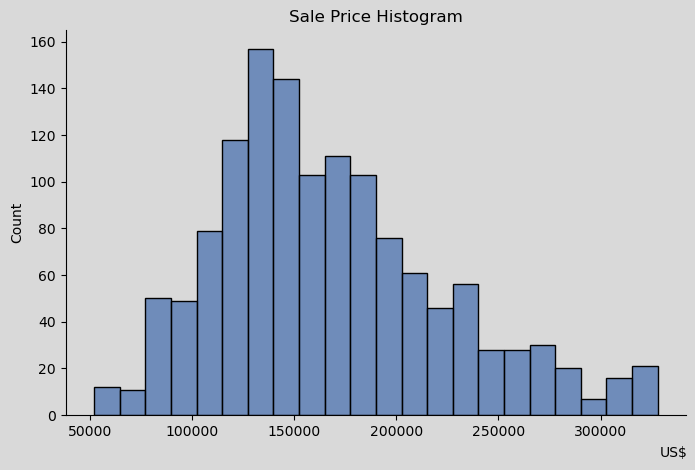

In [330]:
HistPlot(HousePricesDF['SalePrice'], "Sale Price Histogram", "US$", 8)

Let's normalize the distribution by applying a logarithm.

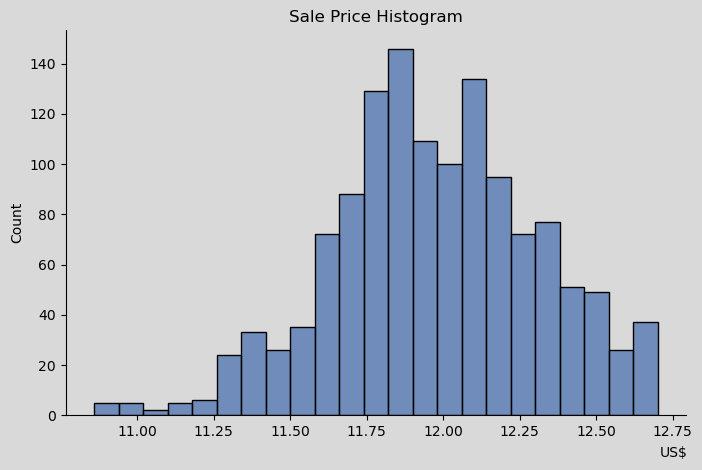

In [332]:
HousePricesDF['SalePrice'] = np.log(HousePricesDF['SalePrice'])
HistPlot(HousePricesDF['SalePrice'], "Sale Price Histogram", "US$", 8)

## **NORMALIZATION**

In [334]:
x_data = HousePricesDF.drop(columns = {'SalePrice'}, axis = 1)
y_data = HousePricesDF[['SalePrice']]
HousePricesDF = HousePricesDF.drop(columns = {'SalePrice'}, axis = 1).copy()

Scaler = MaxAbsScaler()

x_data = pd.DataFrame(Scaler.fit_transform(x_data), columns = x_data.columns)
HousePricesDF = pd.DataFrame(Scaler.transform(HousePricesDF), columns = HousePricesDF.columns)

In [335]:
yhat_sub = HousePricesDF_test[['Id']]
HousePricesDF_test = HousePricesDF_test.drop(columns = {'Id'}, axis = 1).copy()

HousePricesDF_test = pd.DataFrame(Scaler.transform(HousePricesDF_test), columns = HousePricesDF_test.columns).copy()

## **CORRELATION**

In [337]:
columns = ['YearBuilt', 'GarageYrBlt', 'GarageArea', 'ExterQual', 'ExterCond', 'YearRemodAdd', 'WoodDeckSF', 'OpenPorchSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea',
           'OutdoorArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'OverallCond', 'KitchenQual','KitchenAbvGr', 'LotArea', 'LotFrontage',
           'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageQual', 'OpenPorchSF', 'EnclosedPorch']

x_data = x_data.drop(columns = columns, axis = 1)
HousePricesDF_test = HousePricesDF_test.drop(columns = columns, axis = 1)

In [338]:
# Features with strong correlation with other features
columns = ['DecadeBuilt', 'GarageAge', 'SaleType', 'GarageCars']

x_data = x_data.drop(columns = columns, axis = 1)
HousePricesDF_test = HousePricesDF_test.drop(columns = columns, axis = 1)

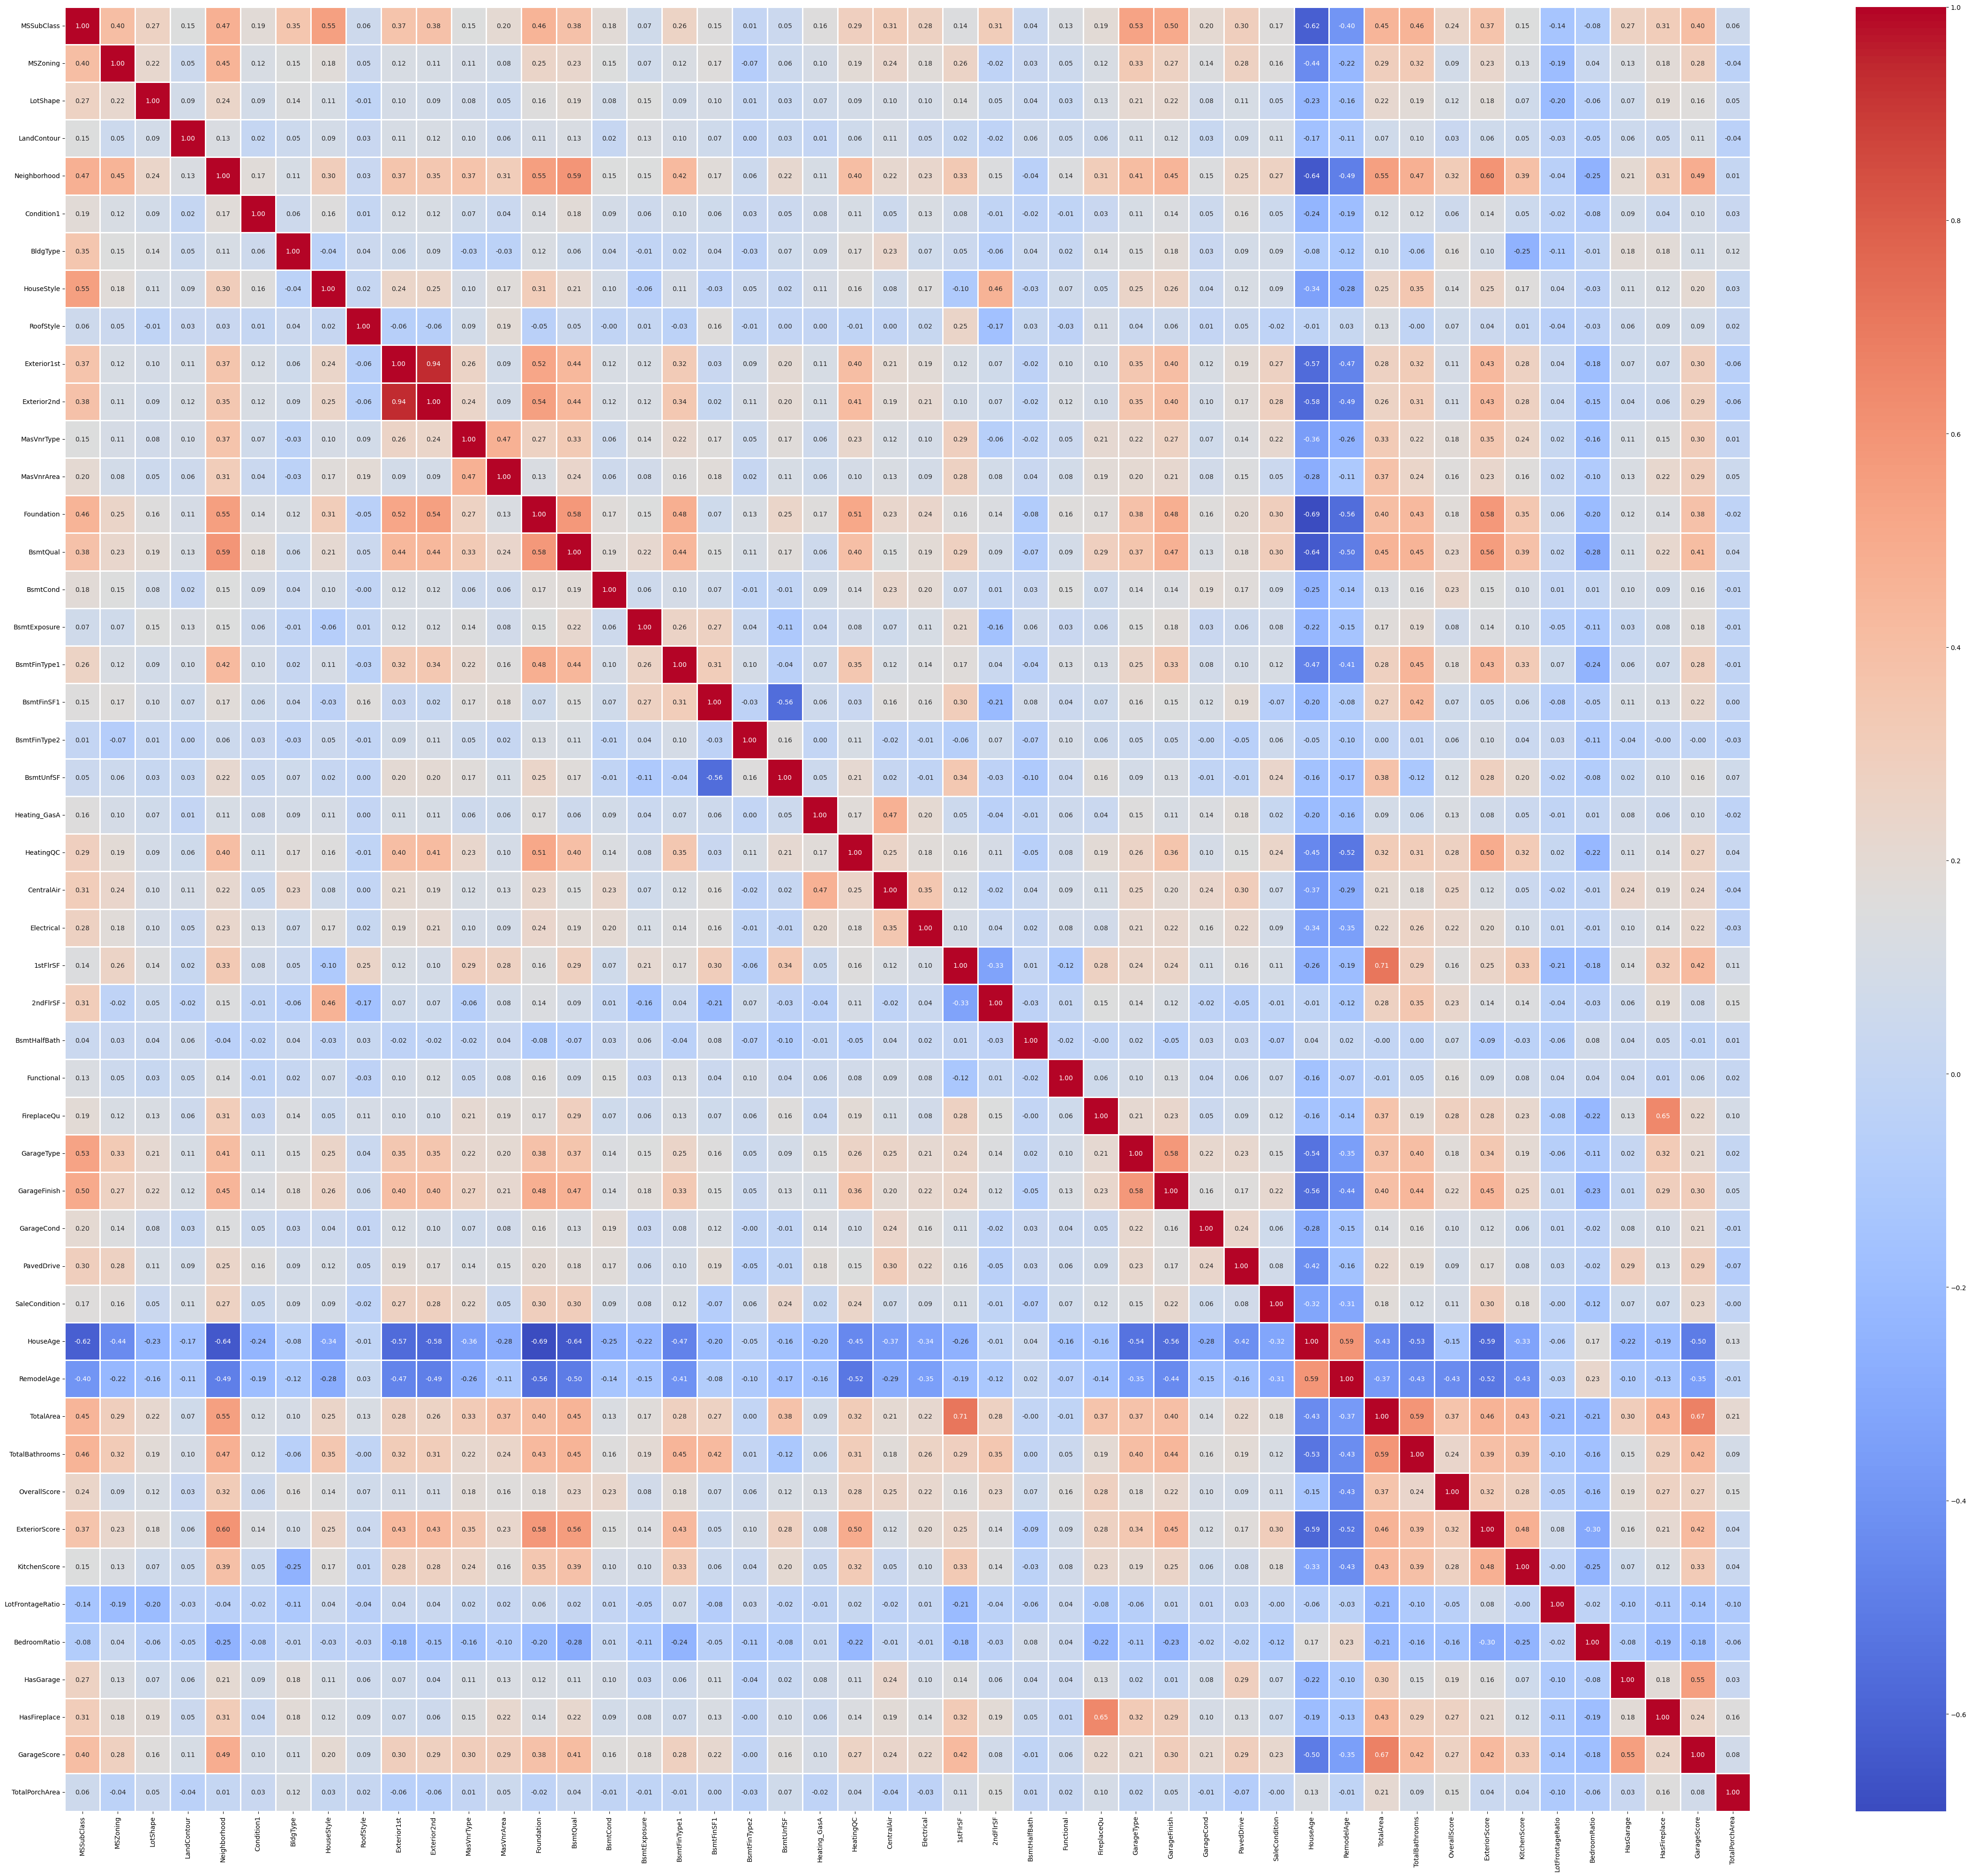

In [339]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = x_data.copy()
corr_matrix = df_corr.corr()

plt.figure(figsize=(58,50))
sns.heatmap(corr_matrix, annot=True, linewidths=1, linecolor='white', cmap='coolwarm', fmt=".2f")

plt.show()
plt.close()

We can see a high correlation between 'HouseAge' and 'RemodelAge', in addition to indicating that they have become highly important features in the dataset. Let's check for multicollinearity among the independent variables.

In [341]:
X_num = x_data[['HouseAge', 'RemodelAge']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(len(X_num.columns))]

vif_data

Feature       VIF
0    HouseAge  3.253635
1  RemodelAge  3.253635

Let's check the feature importance.

In [343]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=13)

In [344]:
lgbm = LGBMRegressor(verbose=0)
lgbm.fit(x_train, y_train)
yhat1 = lgbm.predict(x_test)

xgbr = xgb.XGBRegressor()
xgbr.fit(x_train, y_train)
yhat2 = xgbr.predict(x_test)

cbr = CatBoostRegressor(verbose=0)
cbr.fit(x_train, y_train)
yhat3 = cbr.predict(x_test)

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
yhat4 = gbr.predict(x_test)

feature_importances = pd.DataFrame({'Feature': x_data.columns, 'LGBMR_Importance': lgbm.feature_importances_, 'XGBR_Importance': xgbr.feature_importances_,
                                    'CBR_Importance': cbr.feature_importances_, 'GBR_Importance': gbr.feature_importances_})
feature_importances = feature_importances.sort_values(by='LGBMR_Importance', ascending=False)

feature_importances

Feature  LGBMR_Importance  XGBR_Importance  CBR_Importance  \
37         TotalArea               228         0.307739       29.799945   
42  LotFrontageRatio               164         0.002533        1.272681   
25          1stFlrSF               162         0.001376        1.929333   
39      OverallScore               149         0.048938       12.648741   
20         BsmtUnfSF               140         0.003907        1.356452   
35          HouseAge               134         0.007167        3.495284   
46       GarageScore               130         0.000602        2.221913   
4       Neighborhood               130         0.031989        8.599048   
36        RemodelAge               128         0.018740        2.207928   
47    TotalPorchArea               111         0.002449        1.233228   
18        BsmtFinSF1               109         0.002663        1.705886   
0         MSSubClass                77         0.003691        3.476887   
9        Exterior1st                68         0.001508        0.559297   
17      BsmtFinType1                66         0.001981        0.711706   
34     SaleCondition                65         0.007460        1.289434   
26          2ndFlrSF                65         0.012389        2.067562   
12        MasVnrArea                60         0.000848        0.909760   
29       FireplaceQu                59         0.005959        1.261047   
16      BsmtExposure                56         0.001874        0.584358   
10       Exterior2nd                55         0.001649        0.703835   
43      BedroomRatio                54         0.002710        0.563926   
22         HeatingQC                54         0.004025        0.931740   
31      GarageFinish                53         0.003993        0.843150   
41      KitchenScore                48         0.007119        1.152049   
14          BsmtQual                48         0.019485        1.788183   
7         HouseStyle                47         0.002254        0.370457   
40     ExteriorScore                46         0.132721        2.985514   
2           LotShape                40         0.001818        0.365461   
5         Condition1                40         0.002123        0.835201   
38    TotalBathrooms                37         0.010067        2.916713   
8          RoofStyle                36         0.003826        0.401646   
28        Functional                35         0.003327        0.536589   
15          BsmtCond                34         0.005907        0.489131   
13        Foundation                33         0.000965        0.877149   
3        LandContour                30         0.001310        0.416911   
19      BsmtFinType2                30         0.003128        0.184224   
30        GarageType                29         0.003316        0.776304   
11        MasVnrType                29         0.001101        0.249406   
24        Electrical                29         0.000897        0.227676   
1           MSZoning                21         0.001391        1.134179   
6           BldgType                20         0.001681        0.264754   
32        GarageCond                15         0.004574        0.481863   
33        PavedDrive                14         0.002575        0.328073   
23        CentralAir                 9         0.294684        0.689800   
45      HasFireplace                 7         0.019394        2.072328   
27      BsmtHalfBath                 3         0.000081        0.021699   
44         HasGarage                 3         0.000000        0.057831   
21      Heating_GasA                 0         0.000065        0.003719   

    GBR_Importance  
37        0.592123  
42        0.004200  
25        0.001201  
39        0.086716  
20        0.004693  
35        0.023694  
46        0.001224  
4         0.090430  
36        0.018532  
47        0.003983  
18        0.005685  
0         0.013295  
9         0.000729  
17        0.001545  
34        0.006205  
2

In [345]:
print("LGBMRegressor:", root_mean_squared_error(y_test, yhat1))
print("XGBRegressor:", root_mean_squared_error(y_test, yhat2))
print("CatBoostRegressor:", root_mean_squared_error(y_test, yhat3))
print("GradientBoostingRegressor:", root_mean_squared_error(y_test, yhat4))

LGBMRegressor: 0.11761281357252153
XGBRegressor: 0.1291943635064578
CatBoostRegressor: 0.11411634571885491
GradientBoostingRegressor: 0.11836849091811646


In [346]:
x_data_lgbm = x_data.drop(columns = {'HasGarage', 'Heating_GasA'}, axis = 1)
x_train_lgbm, x_test_lgbm, y_train, y_test = train_test_split(x_data_lgbm, y_data, test_size=0.30, random_state=13)


x_data_xgbr = x_data[['TotalArea', 'ExteriorScore', 'CentralAir', 'Neighborhood', 'RemodelAge', '2ndFlrSF', 'OverallScore', 'TotalBathrooms', 'GarageCond', 'HouseAge', 'FireplaceQu',
                      'BsmtQual', 'KitchenScore', 'HasFireplace', 'Functional', 'SaleCondition']]
x_train_xgbr, x_test_xgbr, _, _ = train_test_split(x_data_xgbr, y_data, test_size=0.30, random_state=13)


x_data_cbr = x_data.drop(columns = {'Heating_GasA', 'HasGarage', 'BsmtHalfBath'}, axis = 1)
x_train_cbr, x_test_cbr, _, _ = train_test_split(x_data_cbr, y_data, test_size=0.30, random_state=13)


x_data_gbr = x_data.drop(columns = {'PavedDrive', 'MasVnrType', 'HasGarage', 'Heating_GasA', 'BsmtFinType2'}, axis = 1)
x_train_gbr, x_test_gbr, _, _ = train_test_split(x_data_gbr, y_data, test_size=0.30, random_state=13)

In [347]:
lgbm = LGBMRegressor(verbose=0)
lgbm.fit(x_train_lgbm, y_train)
yhat1 = lgbm.predict(x_test_lgbm)

xgbr = xgb.XGBRegressor()
xgbr.fit(x_train_xgbr, y_train)
yhat2 = xgbr.predict(x_test_xgbr)

cbr = CatBoostRegressor(verbose=0)
cbr.fit(x_train_cbr, y_train)
yhat3 = cbr.predict(x_test_cbr)

gbr = GradientBoostingRegressor()
gbr.fit(x_train_gbr, y_train)
yhat4 = gbr.predict(x_test_gbr)

print("LGBMRegressor:", root_mean_squared_error(y_test, yhat1))
print("XGBRegressor:", root_mean_squared_error(y_test, yhat2))
print("CatBoostRegressor:", root_mean_squared_error(y_test, yhat3))
print("GradientBoostingRegressor:", root_mean_squared_error(y_test, yhat4))

LGBMRegressor: 0.11761281357252153
XGBRegressor: 0.12639831795439213
CatBoostRegressor: 0.11059340168146707
GradientBoostingRegressor: 0.11819466510804473


In [348]:
HousePricesDF_test_lgbm = HousePricesDF_test.drop(columns = {'HasGarage', 'Heating_GasA'}, axis = 1).copy()
HousePricesDF_test_xgbr = HousePricesDF_test[['TotalArea', 'ExteriorScore', 'CentralAir', 'Neighborhood', 'RemodelAge', '2ndFlrSF', 'OverallScore', 'TotalBathrooms',
                                              'GarageCond', 'HouseAge', 'FireplaceQu', 'BsmtQual', 'KitchenScore', 'HasFireplace', 'Functional', 'SaleCondition']].copy()
HousePricesDF_test_cbr = HousePricesDF_test.drop(columns = {'Heating_GasA', 'HasGarage', 'BsmtHalfBath'}, axis = 1).copy()
HousePricesDF_test_gbr = HousePricesDF_test.drop(columns = {'PavedDrive', 'MasVnrType', 'HasGarage', 'Heating_GasA', 'BsmtFinType2'}, axis = 1)

# **AUTHOR**

## Fábio Galdino